In [1]:
import pickle
import os
import glob
import numpy as np
import json
from scipy.stats import norm

In [2]:
path = "/home/jenna/sacro_results/results/"

In [3]:
os.listdir(path)

['cf7cf863-929a-4b89-962b-7913869167e4',
 'a90983a1-2329-4019-96e8-949493c3fc24',
 '315ac662-9e95-4dec-80f0-48e244f9f8e1',
 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e',
 '96c75293-2026-48af-ad99-37281cb9bb3e',
 '436c714b-b588-4894-b68c-1e0f773e5df1',
 '5238ac7b-ad85-488f-b013-9ee4e2064e60',
 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23',
 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b',
 '26d9e19b-59ed-4bbb-906a-9953b5d2c825',
 'a3347182-4364-43f8-8992-2409b1b66d31',
 'f63b25f4-8df4-4336-8c02-9456eb3c09b0',
 'slinwin_processor.py',
 'e8d3eabc-edd1-414f-9d95-277df742655a',
 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']

In [4]:
# Try one example of pred and true pickle file
example_path = path + os.listdir(path)[0]
example_path

'/home/jenna/sacro_results/results/cf7cf863-929a-4b89-962b-7913869167e4'

In [5]:
pred_labels = pickle.load(open(example_path + "/seq_pred.pickle", 'rb'))
e3d_pred_labels = pickle.load(open(example_path + "/seq_e3d.pickle", 'rb'))
mode_ave_pred_labels = pickle.load(open(example_path + "/seq_mode_av.pickle", 'rb'))
true_labels = pickle.load(open(example_path + "/seq_true.pickle", 'rb'))

In [6]:
print(pred_labels[:10])

[2, 4, 2, 5, 4, 4, 2, 4, 4, 2]


In [7]:
print(e3d_pred_labels[:10])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [8]:
print(mode_ave_pred_labels[:10])

[4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [9]:
print(true_labels[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
# scan through the true labels to see whether there are early phases repeating in the later stage
labels_list = []
labels_freq = []
for current_label in true_labels:
    #if list is empty or current label is not the same as the previous label, 
    #then append the current label and frequency
    if (not labels_list) or (current_label != labels_list[-1]):
        labels_list.append(current_label)
        labels_freq.append(1)
        continue
    # for the other cases, simply update frequency
    labels_freq[-1] += 1
    


In [11]:
# take a look at the frequencies of the labels
print("labels list:{}".format(labels_list))
print("labels freq:{}".format(labels_freq))

labels list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
labels freq:[169, 8, 593, 12, 455, 1, 24, 6, 344, 9, 192]


_From the list and the frequencies, we can see that phase 3 has the highest proportion, and there are jumps from 3 to 4 and then back to 3. The time for the non-classed clips is the shortest between 4 and back to 3, probably because the tools for phase are is already there._

In [12]:
# Now, you need to loop through every video and document the label list and label freq
# Put above code into function
def get_label_list_and_freq(full_path):
#     pred_labels = pickle.load(open(full_path + "/seq_pred.pickle", 'rb'))
    true_labels = pickle.load(open(full_path + "/seq_true.pickle", 'rb'))
    # scan through the true labels to see whether there are early phases repeating in the later stage
    labels_list = []
    labels_freq = []
    for current_label in true_labels:
        #if list is empty or current label is not the same as the previous label, 
        #then append the current label and frequency
        if (not labels_list) or (current_label != labels_list[-1]):
            labels_list.append(current_label)
            labels_freq.append(1)
            continue
        # for the other cases, simply update frequency
        labels_freq[-1] += 1
    return (labels_list, labels_freq)

In [13]:
# Get the list of python files which are no subdirectories
py_files = glob.glob(path+"*.py")
for (i, file) in enumerate(py_files):
    file = file.replace(path, "")
    py_files[i] = file

In [14]:
py_files

['slinwin_processor.py']

In [15]:
# Remove the python file(s)
subdir_list = os.listdir(path)
for file in py_files:
    subdir_list.remove(file)
subdir_list

['cf7cf863-929a-4b89-962b-7913869167e4',
 'a90983a1-2329-4019-96e8-949493c3fc24',
 '315ac662-9e95-4dec-80f0-48e244f9f8e1',
 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e',
 '96c75293-2026-48af-ad99-37281cb9bb3e',
 '436c714b-b588-4894-b68c-1e0f773e5df1',
 '5238ac7b-ad85-488f-b013-9ee4e2064e60',
 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23',
 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b',
 '26d9e19b-59ed-4bbb-906a-9953b5d2c825',
 'a3347182-4364-43f8-8992-2409b1b66d31',
 'f63b25f4-8df4-4336-8c02-9456eb3c09b0',
 'e8d3eabc-edd1-414f-9d95-277df742655a',
 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']

In [16]:
# Loop through the subdirectory and extract the label lists and frequencies
data_dict = {}
for subdir in subdir_list:
    full_path = path + subdir
    labels_list, labels_freq = get_label_list_and_freq(full_path)
    # store the list and corresponding frequency into a dictionary
    labels_dict = {}
    labels_dict["label list"] = labels_list
    labels_dict["label freq"] = labels_freq
    # store the label dictionary into the data dictionary under the corresponding subdirectory
    data_dict[subdir] = labels_dict

In [17]:
print(data_dict)

{'cf7cf863-929a-4b89-962b-7913869167e4': {'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5], 'label freq': [169, 8, 593, 12, 455, 1, 24, 6, 344, 9, 192]}, 'a90983a1-2329-4019-96e8-949493c3fc24': {'label list': [1, 0, 2, 0, 3, 0, 4, 0, 5], 'label freq': [41, 16, 334, 106, 476, 4, 7, 22, 120]}, '315ac662-9e95-4dec-80f0-48e244f9f8e1': {'label list': [1, 2, 0, 3, 0, 4, 0, 3, 0, 5], 'label freq': [84, 231, 23, 544, 24, 26, 39, 192, 7, 184]}, 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e': {'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5], 'label freq': [47, 3, 846, 1, 394, 3, 23, 10, 143, 2, 109]}, '96c75293-2026-48af-ad99-37281cb9bb3e': {'label list': [2, 1, 2, 0, 3, 0, 4, 0, 3, 0, 5], 'label freq': [146, 101, 254, 17, 550, 1, 73, 14, 190, 15, 266]}, '436c714b-b588-4894-b68c-1e0f773e5df1': {'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5], 'label freq': [153, 45, 348, 39, 346, 2, 51, 17, 221, 10, 131]}, '5238ac7b-ad85-488f-b013-9ee4e2064e60': {'label list': [1, 0, 2, 0, 3, 0, 4, 0, 5], 'label freq': [

Results are as shown:  

{'cf7cf863-929a-4b89-962b-7913869167e4':   
    {  
    'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
    'label freq': [169, 8, 593, 12, 455, 1, 24, 6, 344, 9, 192]  
     },   
 'a90983a1-2329-4019-96e8-949493c3fc24':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 5],   
     'label freq': [41, 16, 334, 106, 476, 4, 7, 22, 120]  
     },   
 '315ac662-9e95-4dec-80f0-48e244f9f8e1':   
     {  
     'label list': [1, 2, 0, 3, 0, 4, 0, 3, 0, 5],      
     'label freq': [84, 231, 23, 544, 24, 26, 39, 192, 7, 184]  
     },   
     
 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
     'label freq': [47, 3, 846, 1, 394, 3, 23, 10, 143, 2, 109]  
     },   
 '96c75293-2026-48af-ad99-37281cb9bb3e':   
     {  
     'label list': [2, 1, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
     'label freq': [146, 101, 254, 17, 550, 1, 73, 14, 190, 15, 266]  
     },   
 '436c714b-b588-4894-b68c-1e0f773e5df1':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
     'label freq': [153, 45, 348, 39, 346, 2, 51, 17, 221, 10, 131]  
     },   
 '5238ac7b-ad85-488f-b013-9ee4e2064e60':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 5],   
     'label freq': [54, 1, 728, 28, 379, 14, 21, 62, 151]  
     },   
 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23':   
     {
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
     'label freq': [125, 1, 257, 22, 247, 2, 32, 3, 48, 5, 133]  
     }, 
 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b':   
     {  
     'label list': [1, 2, 0, 3, 4, 0, 5],   
     'label freq': [67, 649, 70, 606, 42, 57, 241]  
     },   
 '26d9e19b-59ed-4bbb-906a-9953b5d2c825':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],  
     'label freq': [69, 1, 334, 43, 428, 2, 6, 5, 193, 14, 207]  
     },   
 'a3347182-4364-43f8-8992-2409b1b66d31':   
     {  
     'label list': [2, 0, 1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],  
     'label freq': [52, 2, 7, 1, 85, 20, 455, 1, 15, 6, 46, 20, 213]  
     },    
 'f63b25f4-8df4-4336-8c02-9456eb3c09b0':   
     {  
     'label list': [1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5],   
     'label freq': [202, 4, 450, 23, 434, 8, 23, 3, 301, 10, 107]  
     },   
 'e8d3eabc-edd1-414f-9d95-277df742655a':    
     {  
     'label list': [2, 0, 1, 0, 2, 0, 3, 0, 4, 0, 3],   
     'label freq': [152, 1, 68, 2, 316, 69, 418, 1, 9, 19, 54]  
     },  
 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec':  
     {  
     'label list': [1, 2, 0, 3, 4, 0, 3, 0, 5],   
     'label freq': [137, 741, 30, 218, 93, 9, 253, 50, 119]  
     }  
 }  
 

In [18]:
print("Number of videos:{}".format(len(data_dict)))

Number of videos:14


### Pattern observed:
1. have 2 -> 1 -> 2 pattern, starting with phase 2 as the initial phase, BUT there isn't 1 -> 2 -> 1. Hence may need memory to flag whether the current phase 2 is the starting phase, coz if it is, then it has probability of jumping back to phase 1, otherwise it will only go to phase 3.
2. have 3 -> 4 -> 3 pattern, but the ending 3 is usually followed by 5. Sometimes it ends at the ending 3. 

In [19]:
# Split the data into the ones with repeating phases and the ones without
# function returns boolean value indicating whether the current video contains non-zero repeating phases
def is_repeating(data):
    '''
    data: the dict keyed using video sequence number
    '''
    prev_phases = []
    for cur_phase in data["label list"]:
        # don't count zeros for repeating phases
        if cur_phase == 0: continue
        # if current phase has been witnessed, return true
        if cur_phase in prev_phases:
            return True
        # else, add the current phase into the prev_phases
        prev_phases.append(cur_phase)
    # return false if no repeating phase
    return False
        
        

In [20]:
# Loop through all data item and split the videos into two lists
no_repeating = []
has_repeating = []
for vid in data_dict:
    if is_repeating(data_dict[vid]):
        has_repeating.append(vid)
    else:
        no_repeating.append(vid)

In [21]:
print("There are {} videos with repeating phases:{}".format(len(has_repeating), has_repeating))
print()
print("There are {} videos without repeating phases:{}".format(len(no_repeating), no_repeating))

There are 11 videos with repeating phases:['cf7cf863-929a-4b89-962b-7913869167e4', '315ac662-9e95-4dec-80f0-48e244f9f8e1', 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e', '96c75293-2026-48af-ad99-37281cb9bb3e', '436c714b-b588-4894-b68c-1e0f773e5df1', 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23', '26d9e19b-59ed-4bbb-906a-9953b5d2c825', 'a3347182-4364-43f8-8992-2409b1b66d31', 'f63b25f4-8df4-4336-8c02-9456eb3c09b0', 'e8d3eabc-edd1-414f-9d95-277df742655a', 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']

There are 3 videos without repeating phases:['a90983a1-2329-4019-96e8-949493c3fc24', '5238ac7b-ad85-488f-b013-9ee4e2064e60', 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b']


# Get probability vectors list

In [22]:
# now that I have got the probability distribution I can try PKI to see whether there is improvement
prob_vec_path = '/home/jenna/jennaCode/model_outputs' 
os.listdir(prob_vec_path)

['cf7cf863-929a-4b89-962b-7913869167e4',
 'a90983a1-2329-4019-96e8-949493c3fc24',
 '.ipynb_checkpoints',
 '315ac662-9e95-4dec-80f0-48e244f9f8e1',
 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e',
 '96c75293-2026-48af-ad99-37281cb9bb3e',
 '436c714b-b588-4894-b68c-1e0f773e5df1',
 '5238ac7b-ad85-488f-b013-9ee4e2064e60',
 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23',
 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b',
 '26d9e19b-59ed-4bbb-906a-9953b5d2c825',
 'a3347182-4364-43f8-8992-2409b1b66d31',
 'f63b25f4-8df4-4336-8c02-9456eb3c09b0',
 'e8d3eabc-edd1-414f-9d95-277df742655a',
 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']

In [23]:
# Try one example of prob vec pickle file
example_prob_vec_path = os.path.join(prob_vec_path, os.listdir(prob_vec_path)[0])
example_prob_vec_path

'/home/jenna/jennaCode/model_outputs/cf7cf863-929a-4b89-962b-7913869167e4'

In [24]:
example_prob_vec = pickle.load(open(example_prob_vec_path + "/prob_vectors.pickle", 'rb'))
example_pred_labels = pickle.load(open(example_prob_vec_path + "/seq_pred.pickle", 'rb'))

In [25]:
print(example_prob_vec[:10])

[[1.61301102e-02 2.06003532e-01 7.50325084e-01 3.53474566e-03
  1.30244102e-02 1.09822378e-02]
 [6.60147741e-02 1.81815736e-02 2.02155679e-01 6.91310391e-02
  6.02180898e-01 4.23360802e-02]
 [4.86351661e-02 5.23815379e-02 5.18992424e-01 6.36446923e-02
  2.59962291e-01 5.63839488e-02]
 [1.01345882e-01 2.53924560e-02 4.93788302e-01 3.66287795e-03
  3.42448473e-01 3.33619863e-02]
 [2.77488306e-02 6.12260867e-03 1.21907210e-02 1.29257152e-02
  9.37360942e-01 3.65125341e-03]
 [1.58225838e-02 4.55546324e-05 1.94950367e-03 4.87861875e-03
  9.76101696e-01 1.20211835e-03]
 [8.31847265e-03 7.05868661e-01 2.77028650e-01 2.94004043e-04
  1.17838895e-03 7.31188711e-03]
 [1.08516626e-01 1.18921967e-02 7.47655854e-02 8.87262523e-02
  4.77993369e-01 2.38105953e-01]
 [4.27953266e-02 3.29357176e-03 1.96241941e-02 3.64351235e-02
  8.84503484e-01 1.33483261e-02]
 [2.73825880e-03 2.61314004e-03 9.55466270e-01 2.45510717e-03
  3.58595960e-02 8.67551076e-04]]


In [26]:
# pred labels from data given by yitong
print(pred_labels[:10])

[2, 4, 2, 5, 4, 4, 2, 4, 4, 2]


In [27]:
pred_from_prob = [np.argmax(arr) for arr in example_prob_vec]

In [28]:
 print(pred_from_prob[:500])

[2, 4, 2, 2, 4, 4, 1, 4, 4, 2, 2, 5, 2, 5, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 5, 5, 4, 4, 3, 5, 5, 5, 5, 1, 1, 1, 1, 2, 5, 1, 1, 1, 5, 5, 5, 5, 1, 4, 4, 1, 5, 1, 4, 1, 1, 5, 1, 1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 1, 2, 1, 2, 5, 2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 4, 2, 1, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 5, 2, 5, 3, 5, 2, 3, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 

In [29]:
print(type(pred_labels))

<class 'list'>


In [30]:
# accuracy
from sklearn.metrics import accuracy_score, precision_score

accuracy_score(true_labels, pred_labels)

0.6530612244897959

In [31]:
# try implement PKI and check for accuracy again
'''
Prior Knowledge Inference:
Use prior knowledge of the phases to determine the current phase
Threshold 1: number of phases to update the prior phase - set to 5 for now 
Threshold 2: probability threshold to keep the results from CNN - set to 0.5 for now, i.e. no bias towards or against CNN
Prior phase: initialize to phase 1 for now
'''
def pki(prob_vec_list, seq_pred, prior_th, prob_th, is_verbose=False):
    pred_output = np.array(seq_pred).copy()
    # initialise prior phase to phase 1
    prior = 1
    prev = pred_output[0]
    # keep a counter to count how many new phases have appeared. if count > 5, update the prior to new phases
    count_new_phases = 0
    for index, prediction in enumerate(pred_output):
        # if current prediction is same as the previous one, counter increment by 1
        if prediction == prev:
            count_new_phases += 1
        else:
            # reset counter
            prev = prediction
            count_new_phases = 1


        # if counter > threshold, update prior
        if index <= 400 and is_verbose:
            print("Index {}: prior {}, prediction {}, prev {}, counter for prediction {}".format(index, prior, prediction, prev, count_new_phases))
        if count_new_phases > prior_th and prior != prev:
            if index <= 200 and is_verbose:
                print("Index {}: counter of phase {} is {}. Prior updated from {} to {}.".format(index, prev, count_new_phases, prior, prev))
            prior = prev
        # if CNN probability is bigger than 0.5, keep CNN prediction; else update it to prior
#         if prob_vec_list[index][prediction] < prob_th:
        pred_output[index] = prior
        
    if is_verbose:
        print()
    return pred_output
        
    

In [32]:
pki_output = pki(example_prob_vec, pred_labels, 4, 1)

In [33]:
print(pki_output[:500])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [34]:
print("Accuracy of using only CNN for prediction is {}".format(accuracy_score(true_labels, pred_labels)))
print("Accuracy of using CNN followed by PKI for prediction is {}".format(accuracy_score(true_labels, pki_output)))

Accuracy of using only CNN for prediction is 0.6530612244897959
Accuracy of using CNN followed by PKI for prediction is 0.8063982349696636


## record results here


accuracy of using 3 and 0.5: 0.7352454495311638   
accuracy of using 5 and 0.5: 0.7380033094318809  
accuracy of using 8 and 0.5: 0.7363485934914507  
accuracy of using 10 and 0.5: 0.7357970215113072   

accuracy of using 5 and 0.6: 0.758411472697187   
accuracy of using 5 and 0.7: 0.7716492002206288   
accuracy of using 5 and 0.75: 0.7793712079426365   
accuracy of using 5 and 0.78: 0.7815774958632101  
accuracy of using 5 and 0.8: 0.7848869277440707    
accuracy of using 5 and 1: 0.8080529509100938   

accuracy of using 4 and 0.95: 0.797573083287369  
accuracy of using 5 and 0.95: 0.7931605074462217  

accuracy of using 3 and 1: 0.8041919470490899  
accuracy of using 4 and 1: 0.809707666850524   
accuracy of using 5 and 1: 0.8080529509100938  
accuracy of using 6 and 1: 0.8019856591285163 

**The results show that when disregarding the probability from CNN, and completely depending on prior, it gives the best performance.**

**Problem: no way to detect zero phase based on CNN results**

# Get PKI results for all the videos based on fold and division

In [35]:
# hand tune for each fold. change the parameters here#######
prob_th = 1
prior_th = 3
##############################


# ALL PATHS
paramPath = "/home/yitong/venv_yitong/sacro_wf_analysis/params"
path_prefix= '/home/yitong/venv_yitong/sacro_wf_analysis/'
whole_path = path_prefix + 'data/sacro_sequence/whole'
videos_path = path_prefix + 'data/sacro_jpg'
output_path = '/home/jenna/jennaCode/model_outputs'
true_label_path = "/home/jenna/sacro_results/results/"

# folds for cross vaildation devision
folders = ['folder1', 'folder2', 'folder3', 'folder4', 'folder5', 'folder6', 'folder7']
divs = ['div1', 'div2', 'div3', 'div4', 'div5', 'div6', 'div7']

# for results
pki_ave_test_accs = []

for index in range(7):
    folder = folders[index]
    div = divs[index]

    whole_folder_path = os.path.join(whole_path, folder)
    with open(os.path.join(videos_path, 'dataset_' + div + '.json'), 'r') as json_data:
        temp = json.load(json_data)
    # use all training and validation data for training
    video_train = temp['train']
    video_validation = temp['validation']
    print('The current training video train: {}'.format(video_train))
    video_test = temp['test']
    print('The current testing video train: {}'.format(video_test))

    # apply pki with the video_train to get an average accuracy
    # tune parameters with different prior threshold

    ave_tr_acc = 0
    for video in video_train:
        prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
        pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
        true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
        pki_output = pki(prob_vec, pred_labels, prior_th, prob_th)
        acc = accuracy_score(true_labels, pki_output)
        ave_tr_acc += acc

    ave_tr_acc /= len(video_train)
    print("Average training accuracy of fold {} with prior_th = {} and prob_th = {} is {}".format(index+1, prior_th, prob_th, ave_tr_acc))
    print()

    
    
    # validation
    ave_val_acc = 0
    for video in video_validation:
        prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
        pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
        true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
        pki_output = pki(prob_vec, pred_labels, prior_th, prob_th)
    #         print("Prediction accuracy by CNN: {} ".format(accuracy_score(true_labels, pred_labels)))
        acc = accuracy_score(true_labels, pki_output)
    #         precision = precision_score(true_labels, pki_output, labels=[0,1,2,3,4,5], average='macro')
        ave_val_acc += acc

    #         print("Video {} with prior_th = {} has validation accuracy {} and precision {}".format(video, prior_th, acc, precision))
    #         print("True labels: {}".format(true_labels[:100]))
    #         print("Pred labels: {}".format(pred_labels[:100]))
    #         print("PKI outputs: {}".format(pki_output[:100]))

    ave_val_acc /= len(video_validation)
    print("Average validation accuracy of fold {} with prior_th = {} and prob_th = {} is {}".format(index+1, prior_th, prob_th, ave_val_acc))
    print()
    
    # test
    ave_test_acc = 0
    for video in video_test:
        prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
        pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
        true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
        pki_output = pki(prob_vec, pred_labels, prior_th, prob_th)
#         print("Prediction accuracy by CNN: {} ".format(accuracy_score(true_labels, pred_labels)))
        acc = accuracy_score(true_labels, pki_output)
        ave_test_acc += acc

        print("Video {} has test accuracy {}".format(video, acc))
        
    ave_test_acc /= len(video_test)
    pki_ave_test_accs.append(ave_test_acc)
    print("Average test accuracy of fold {} with prior_th = {} and prob_th = {} is {}".format(index+1, prior_th, prob_th, ave_test_acc))
    print()
    

The current training video train: ['e8d3eabc-edd1-414f-9d95-277df742655a', '26d9e19b-59ed-4bbb-906a-9953b5d2c825', '5238ac7b-ad85-488f-b013-9ee4e2064e60', '436c714b-b588-4894-b68c-1e0f773e5df1', 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e', 'a3347182-4364-43f8-8992-2409b1b66d31', 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b', '96c75293-2026-48af-ad99-37281cb9bb3e', '315ac662-9e95-4dec-80f0-48e244f9f8e1', 'a90983a1-2329-4019-96e8-949493c3fc24']
The current testing video train: ['e8d7e0c4-b293-43ce-832f-c37fb8fd3b23', 'f63b25f4-8df4-4336-8c02-9456eb3c09b0']
Average training accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.7508466508756244

Average validation accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.7807715322001036

Video e8d7e0c4-b293-43ce-832f-c37fb8fd3b23 has test accuracy 0.6834285714285714
Video f63b25f4-8df4-4336-8c02-9456eb3c09b0 has test accuracy 0.9015974440894569
Average test accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.7925130077590141

The current tr

In [36]:
# pki_ave_test_accs holds the 7 average test results
print(len(pki_ave_test_accs))

7


In [37]:
pki_ave_test = sum(pki_ave_test_accs)/len(pki_ave_test_accs)
pki_ave_test

0.7610739706196056

## record results of training PKI on all folds:
Average accuracy of fold 1 with prior_th = 4 and prob_th = 1 is 0.7574578705998676  
Average accuracy of fold 1 with prior_th = 4 and prob_th = 0.8 is 0.725925655636102  
Average accuracy of fold 1 with prior_th = 4 and prob_th = 0.6 is 0.6904438413378784   

Average accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.7668683290478187   

Average accuracy of fold 1 with prior_th = 2 and prob_th = 1 is 0.7498360932292092   

=======
fold 1: prior_th = 3 and prob_th = 1
=======  


Average accuracy of fold 2 with prior_th = 2 and prob_th = 1 is 0.7599713052156475  
Average accuracy of fold 2 with prior_th = 3 and prob_th = 1 is 0.7790179193036015  
Average accuracy of fold 2 with prior_th = 4 and prob_th = 1 is 0.7599173883204134  

Average accuracy of fold 2 with prior_th = 2 and prob_th = 0.9 is 0.7420986687927811  
Average accuracy of fold 2 with prior_th = 3 and prob_th = 0.9 is 0.7553859703305618  
Average accuracy of fold 2 with prior_th = 4 and prob_th = 0.9 is 0.7455247430460634  

=======
fold 2: prior_th = 3 and prob_th = 1
=======  


Average accuracy of fold 3 with prior_th = 3 and prob_th = 1 is 0.7959578556941407   
Average accuracy of fold 3 with prior_th = 3 and prob_th = 0.9 is 0.7768489720322854  

=======
fold 3: prior_th = 3 and prob_th = 1
=======  


Average accuracy of fold 4 with prior_th = 3 and prob_th = 1 is 0.7891135666223035    
Average accuracy of fold 4 with prior_th = 4 and prob_th = 1 is 0.7932076436941349   
Average accuracy of fold 4 with prior_th = 5 and prob_th = 1 is 0.7804359841164158   

Training data with 4 has higher accuracy BUT validation data with 3 has higher accuracy, so I used 3.

=======
fold 4: prior_th = 3 and prob_th = 1
=======  

Average accuracy of fold 5 with prior_th = 3 and prob_th = 1 is 0.7725121287694008  
Average accuracy of fold 5 with prior_th = 4 and prob_th = 1 is 0.7596752493690193  
Average accuracy of fold 5 with prior_th = 5 and prob_th = 1 is 0.7407984014368268  
Average accuracy of fold 5 with prior_th = 6 and prob_th = 1 is 0.7426324701757324  

Average validation accuracy of fold 5 with prior_th = 3 and prob_th = 1 is 0.7887248634434596  
Average validation accuracy of fold 5 with prior_th = 4 and prob_th = 1 is 0.8095614068206332  
Average validation accuracy of fold 5 with prior_th = 5 and prob_th = 1 is 0.8286145263709991  
Average validation accuracy of fold 5 with prior_th = 6 and prob_th = 1 is 0.8362066414489024  

=======
fold 5: prior_th = 6 and prob_th = 1
=======  

=======
fold 6: prior_th = 3 and prob_th = 1
=======  

=======
fold 7: prior_th = 3 and prob_th = 1
=======  



----------

>Conclusion: softmax layer output doesn't really make any impact. The results are the best when PKI completely depends on prediction 

### report evaluation of trained PKI prior parameters on validation and testing data for all folds
fold 1:  
Average validation accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.7904173561316419   
Average test accuracy of fold 1 with prior_th = 3 and prob_th = 1 is 0.8061159287996349   

fold 2:  
Average validation accuracy of fold 2 with prior_th = 3 and prob_th = 1 is 0.7453679775207201  
Average test accuracy of fold 2 with prior_th = 3 and prob_th = 1 is 0.7904173561316419  

fold 3:  
Average validation accuracy of fold 2 with prior_th = 3 and prob_th = 1 is 0.7057176741789462  
Average test accuracy of fold 2 with prior_th = 3 and prob_th = 1 is 0.7453679775207201  

fold 4:  
Average validation accuracy of fold 4 with prior_th = 3 and prob_th = 1 is 0.7795894228799058  
Average test accuracy of fold 4 with prior_th = 3 and prob_th = 1 is 0.7057176741789462

fold 5:  
Average validation accuracy of fold 5 with prior_th = 6 and prob_th = 1 is 0.8362066414489024  
Average test accuracy of fold 5 with prior_th = 6 and prob_th = 1 is 0.7452645616314537  

fold 6:  
Average validation accuracy of fold 6 with prior_th = 3 and prob_th = 1 is 0.8149417072160607  
Average test accuracy of fold 6 with prior_th = 3 and prob_th = 1 is 0.7887248634434596  


fold 7:  
Average accuracy of fold 7 with prior_th = 3 and prob_th = 1 is 0.7619634588309347  
Average test accuracy of fold 7 with prior_th = 3 and prob_th = 1 is 0.8149417072160607   

In [38]:
ave_test = 0.8061159287996349 + 0.7904173561316419 + 0.7453679775207201 + 0.7057176741789462 + 0.7452645616314537  + 0.7887248634434596  + 0.8149417072160607   
ave_test /= 7
print("average testing accuracy of using vanilla PKI on CNN prediction results: {}".format(ave_test))

average testing accuracy of using vanilla PKI on CNN prediction results: 0.7709357241317026


# Get other prior statistics from ground truth

### Other priors that can be considered
- number of phases into the current prior (i.e. number of phases into the current phase), which can then be used to change the phase prior accordingly   -> current incremental interval
- probability of being in the current phase -> the number of total current phases divided by total number of phases, which can be used to change the weight (which can be used to determine the probability of the current prior phase)
- transition probability from state i to j= (the most primitive:) number of transitions from i to j devided by all transitions from i (should be fixed)
- Therefore, the overall probability that the transition from State 0 to State 1 will occur during a specific incremental interval of time dt is given by multiplying (1) the probability of being in State 0 at the beginning of that interval (based on percentage?), and (2) the probability of the transition during an interval dt given that it was in State 0 at the beginning of that increment. 
- There is a transition probability, which is the rate parameter, which changes the probability of staying in the current phase for each time
- Based on the exponential modeling, P_0(t) = e^(-lambda \times t),  P_1(t) = 1 - e^(-lambda \times t)

## Prior parameters:

In [39]:
for vid in data_dict:
    print("{}:".format(vid))
    print("label list:{}\nlabel freq:{}".format(data_dict[vid]["label list"], data_dict[vid]["label freq"]))

cf7cf863-929a-4b89-962b-7913869167e4:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[169, 8, 593, 12, 455, 1, 24, 6, 344, 9, 192]
a90983a1-2329-4019-96e8-949493c3fc24:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 5]
label freq:[41, 16, 334, 106, 476, 4, 7, 22, 120]
315ac662-9e95-4dec-80f0-48e244f9f8e1:
label list:[1, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[84, 231, 23, 544, 24, 26, 39, 192, 7, 184]
b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[47, 3, 846, 1, 394, 3, 23, 10, 143, 2, 109]
96c75293-2026-48af-ad99-37281cb9bb3e:
label list:[2, 1, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[146, 101, 254, 17, 550, 1, 73, 14, 190, 15, 266]
436c714b-b588-4894-b68c-1e0f773e5df1:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[153, 45, 348, 39, 346, 2, 51, 17, 221, 10, 131]
5238ac7b-ad85-488f-b013-9ee4e2064e60:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 5]
label freq:[54, 1, 728, 28, 379, 14, 21, 62, 151]
e8d7e0c4-b293-43ce-832f-c37fb8fd3b23:
label l

## Initialisation Probability

In [40]:
# Initialisation probability
def getInitProb(data_dict):
    # initialise 
    init_count = np.array([0]*6)
    for vid in data_dict:
        init_phase = data_dict[vid]['label list'][0]
        init_count[init_phase] += 1
    print("Count of initial phases: {}".format(init_count))
    total = np.sum(init_count)
    print("Total:{}".format(total))
    
    init_prob = np.array([0.0]*6)
    for i in range(len(init_prob)):
        init_prob[i] = init_count[i]/total
    print("Initialisation probability vector: {}".format(init_prob))
    return init_prob

In [41]:
init_prob = getInitProb(data_dict)

Count of initial phases: [ 0 11  3  0  0  0]
Total:14
Initialisation probability vector: [0.         0.78571429 0.21428571 0.         0.         0.        ]


In [42]:
# rearrange the probability based on size and store the phase accordingly for use later
init_prob_sorted = np.sort(init_prob)
non_zero_init_prob_sorted = []
# disregard all the zeros
for prob in init_prob_sorted:
    if prob != 0:
        non_zero_init_prob_sorted.append(prob)
non_zero_init_prob_sorted = np.array(non_zero_init_prob_sorted)
print(non_zero_init_prob_sorted)

[0.21428571 0.78571429]


In [43]:
# loop through unsorted init prob vector and find the corresponding phases
non_zero_init_prob_phase_num = len(non_zero_init_prob_sorted)
init_phases_sorted = [0]*non_zero_init_prob_phase_num
for phase, prob in enumerate(init_prob):
    if prob == 0:
        continue
    # check the phase of the corresponding non-zero init prob
    for index in range(non_zero_init_prob_phase_num):
        if non_zero_init_prob_sorted[index] == prob:
            init_phases_sorted[index] = phase
            
            
print("Corresponding phases with order sorted in initialisation probability:")
print(init_phases_sorted)

Corresponding phases with order sorted in initialisation probability:
[2, 1]


## Mean and Standard Devidation of the percentage length of each phase 

In [44]:
# Get phase duration percentage for each video
def getPhasePercByVid(data_dict):
    # dictionary to store all percentage vectors
    phase_perc_mat = np.array([[0,0,0,0,0,0]])
    for vid in data_dict:
        # init a counter for every video
        phase_count = np.array([0]*6)
        # get total frame in the end
        total = 0
        
        for index, freq in enumerate(data_dict[vid]['label freq']):
            # get the corresponding label and add the counts to the label
            phase_count[data_dict[vid]['label list'][index]] += freq
            total += freq
        
        # get the percentage for each phase
        phase_perc = np.array([0.0]*6)
        for i in range(6):
            phase_perc[i] = phase_count[i]/total
            
        # add the vector to the dictionary
        phase_perc_mat = np.append(phase_perc_mat, np.array([phase_perc]), axis=0)
    
    # remove the first array that gives the shape of the numpy array
    return np.delete(phase_perc_mat, 0, axis=0)

In [45]:
phase_perc_mat_by_vid = getPhasePercByVid(data_dict)
print("Phase percentage matrix by video:")
print(phase_perc_mat_by_vid)
print("Shape of matrix:{}".format(phase_perc_mat_by_vid.shape))
print("Total number of videos:{}".format(len(phase_perc_mat_by_vid)))

Phase percentage matrix by video:
[[0.01985659 0.09321566 0.32708218 0.44070601 0.01323773 0.10590182]
 [0.13143872 0.03641208 0.29662522 0.42273535 0.0062167  0.10657194]
 [0.06868538 0.0620384  0.17060561 0.54357459 0.01920236 0.13589365]
 [0.01201771 0.02972802 0.53510436 0.33965844 0.01454775 0.06894371]
 [0.02888752 0.06207744 0.24585126 0.45482483 0.04486785 0.16349109]
 [0.08290536 0.11225238 0.25531915 0.41599413 0.03741746 0.09611152]
 [0.07301808 0.03755216 0.50625869 0.2635605  0.01460362 0.10500695]
 [0.03771429 0.14285714 0.29371429 0.33714286 0.03657143 0.152     ]
 [0.07332564 0.0386836  0.37471132 0.34988453 0.02424942 0.1391455 ]
 [0.0499232  0.05299539 0.25652842 0.47695853 0.00460829 0.15898618]
 [0.05417118 0.00758397 0.14842904 0.54279523 0.01625135 0.23076923]
 [0.03067093 0.12907348 0.28753994 0.46964856 0.01469649 0.06837061]
 [0.08295762 0.0613165  0.4220018  0.42560866 0.00811542 0.        ]
 [0.05393939 0.0830303  0.44909091 0.28545455 0.05636364 0.07212121]]

In [46]:
# Get phase duration percentage for each phase across all videos
# Output is a dictionary indexed by each phase. The value is the length of the key phase across all videos
def getPhasePercByPhase(phase_perc_mat_by_vid):
    return phase_perc_mat_by_vid.T
    

In [47]:
phase_perc_mat_by_phase = getPhasePercByPhase(phase_perc_mat_by_vid)
print(phase_perc_mat_by_phase)

[[0.01985659 0.13143872 0.06868538 0.01201771 0.02888752 0.08290536
  0.07301808 0.03771429 0.07332564 0.0499232  0.05417118 0.03067093
  0.08295762 0.05393939]
 [0.09321566 0.03641208 0.0620384  0.02972802 0.06207744 0.11225238
  0.03755216 0.14285714 0.0386836  0.05299539 0.00758397 0.12907348
  0.0613165  0.0830303 ]
 [0.32708218 0.29662522 0.17060561 0.53510436 0.24585126 0.25531915
  0.50625869 0.29371429 0.37471132 0.25652842 0.14842904 0.28753994
  0.4220018  0.44909091]
 [0.44070601 0.42273535 0.54357459 0.33965844 0.45482483 0.41599413
  0.2635605  0.33714286 0.34988453 0.47695853 0.54279523 0.46964856
  0.42560866 0.28545455]
 [0.01323773 0.0062167  0.01920236 0.01454775 0.04486785 0.03741746
  0.01460362 0.03657143 0.02424942 0.00460829 0.01625135 0.01469649
  0.00811542 0.05636364]
 [0.10590182 0.10657194 0.13589365 0.06894371 0.16349109 0.09611152
  0.10500695 0.152      0.1391455  0.15898618 0.23076923 0.06837061
  0.         0.07212121]]


In [48]:
# Get mean and std from each phase's length distribution
def getMeanAndStd(phase_perc_mat_by_phase):
    norm_params_dict = {}
    for phase, lengths in enumerate(phase_perc_mat_by_phase):
        mu, std = norm.fit(lengths)
        norm_params_dict[phase] = (mu, std)
    return norm_params_dict

In [49]:
norm_params_dict = getMeanAndStd(phase_perc_mat_by_phase)
for k, v in norm_params_dict.items():
    print("Duration percentage of phase {} has mean and std : {}". format(k, v))

Duration percentage of phase 0 has mean and std : (0.05710797112220632, 0.030321443261777936)
Duration percentage of phase 1 has mean and std : (0.06777261004314016, 0.03816546406393554)
Duration percentage of phase 2 has mean and std : (0.3263472992450161, 0.11284218205253618)
Duration percentage of phase 3 has mean and std : (0.4120390546260583, 0.08352923836196571)
Duration percentage of phase 4 has mean and std : (0.022210679714868137, 0.015080408295242551)
Duration percentage of phase 5 has mean and std : (0.11452238524871104, 0.053481343652044204)


In [50]:
# check the summation of mean percentage
0.05710797112220632 + 0.06777261004314016 + 0.3263472992450161 + 0.4120390546260583 + 0.022210679714868137 + 0.11452238524871104

1.0

## Transition Probability

In [51]:
def getTransProbMatWithZero(data_dict):
    # count transitions from phase i to all phases and devided by total transitions made from phase i
    trans_mat = np.array([[0.0]*6]*6)
    for vid in data_dict:
        label_list = data_dict[vid]["label list"]
        label_freq = data_dict[vid]["label freq"]
        total_trans_label_list = len(label_list)
        for index, phase in enumerate(label_list):
            # add freq-1 for each phase to the same phase transition
            # at the end of current label, add 1 to the transition 
            trans_mat[phase][phase] += label_freq[index] - 1
            if (index < total_trans_label_list - 1):
                trans_mat[phase][label_list[index+1]] += 1
#         print("Counting of transitions for {} looks like...".format(vid))
#         print(trans_mat)
    # calculate the probability of transition for each row
    for i in range(len(trans_mat)):
        total = np.sum(trans_mat[i])
        trans_mat[i] = trans_mat[i]/total
        
    print("Final transition probability matrix with phase zero looks like...")
    print(trans_mat)
    return trans_mat
    

In [52]:
np.set_printoptions(suppress=True, precision=6)
trans_mat = getTransProbMatWithZero(data_dict)

Final transition probability matrix with phase zero looks like...
[[0.941784 0.001878 0.00939  0.023474 0.011268 0.012207]
 [0.007553 0.989426 0.003021 0.       0.       0.      ]
 [0.002455 0.000153 0.997391 0.       0.       0.      ]
 [0.002773 0.       0.       0.996975 0.000252 0.      ]
 [0.031461 0.       0.       0.       0.968539 0.      ]
 [0.       0.       0.       0.       0.       1.      ]]


In [53]:
def getTransProbMatWithoutZero(data_dict):
    # The transition matrix here excludes phase zero
    # count transitions from phase i to all phases and devided by total transitions made from phase i
    trans_mat = np.array([[0.0]*5]*5)
    for vid in data_dict:
        label_list = data_dict[vid]["label list"]
        label_freq = data_dict[vid]["label freq"]
        total_trans_label_list = len(label_list)
        prev_phase = 0
        for index, phase in enumerate(label_list):
            # add freq-1 for each phase to the same phase transition
            # at the end of current label, add 1 to the transition 
            if phase == 0:
                continue
            if prev_phase != 0:
                trans_mat[prev_phase-1][phase-1] += 1
            trans_mat[phase-1][phase-1] += label_freq[index] - 1
            prev_phase = phase
#         print("Counting of transitions for {} looks like...".format(vid))
#         print(trans_mat)
    # calculate the probability of transition for each row
    for i in range(len(trans_mat)):
        total = np.sum(trans_mat[i])
        trans_mat[i] = trans_mat[i]/total
        
    print("Final transition probability matrix without phase zero looks like...")
    print(trans_mat)
    return trans_mat

In [54]:
np.set_printoptions(suppress=True, precision=6)
trans_mat_wo_zero = getTransProbMatWithoutZero(data_dict)

Final transition probability matrix without phase zero looks like...
[[0.989426 0.010574 0.       0.       0.      ]
 [0.00046  0.997391 0.002149 0.       0.      ]
 [0.       0.       0.996975 0.001765 0.00126 ]
 [0.       0.       0.024719 0.968539 0.006742]
 [0.       0.       0.       0.       1.      ]]


## Segment Transition Statistics
#### Segment is defined to be the collection of frames where the ground truth labels are the same 
#### Segment transition probability can be used together with frame transition matrix to fit in models like 
1. Hierarchical Hiddem Markov Model    
2. M/sM-Conditional Random Field   

In [55]:
# Function to compute segment transition probability with zero
def getSegmentTransMatrixWithZero(data_dict):
    trans_mat = np.array([[0.0]*6]*6)
    for vid in data_dict:
        label_list = data_dict[vid]["label list"]
        prev_label = -1
        for label in label_list:
            # current label is the first label: skip current round
            if prev_label == -1:
                prev_label = label
                continue
            # there is previous_label: compute the stats
            trans_mat[prev_label][label] += 1
            prev_label = label
    
    # calculate the probability of transition for each row
    for i in range(len(trans_mat)):
        total = np.sum(trans_mat[i])
        # if no transition to other phases, skip to avoid division error
        if total == 0: 
            continue
        trans_mat[i] = trans_mat[i]/total
    return trans_mat

In [56]:
np.set_printoptions(suppress=True, precision=6)
seg_trans_mat_w_zero = getSegmentTransMatrixWithZero(data_dict)
print("Segment transition statistics with phase zero look like...")
print(seg_trans_mat_w_zero)

Segment transition statistics with phase zero look like...
[[0.       0.032258 0.16129  0.403226 0.193548 0.209677]
 [0.714286 0.       0.285714 0.       0.       0.      ]
 [0.941176 0.058824 0.       0.       0.       0.      ]
 [0.916667 0.       0.       0.       0.083333 0.      ]
 [1.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]]


In [57]:
# Function to compute segment transition probability without zero
def getSegmentTransMatrixWithoutZero(data_dict):
    trans_mat = np.array([[0.0]*5]*5)
    for vid in data_dict:
        label_list = data_dict[vid]["label list"]
        prev_label = -1
        for label in label_list:
            # skip phase zero
            if label == 0:
                continue
            # when there is previous_label: compute the stats
            if prev_label != -1:
                trans_mat[prev_label-1][label-1] += 1
            prev_label = label
    
    # print counts to check for correctness
    print("Counts of segments:")
    print(trans_mat)
    # calculate the probability of transition for each row
    for i in range(len(trans_mat)):
        total = np.sum(trans_mat[i])
        # if no transition to other phases, skip to avoid division error
        if total == 0: 
            continue
        trans_mat[i] = trans_mat[i]/total
    return trans_mat


In [58]:
np.set_printoptions(suppress=True, precision=6)
seg_trans_mat_wo_zero = getSegmentTransMatrixWithoutZero(data_dict)
print("Segment transition statistics without phase zero look like...")
print(seg_trans_mat_wo_zero)

Counts of segments:
[[ 0. 14.  0.  0.  0.]
 [ 3.  0. 14.  0.  0.]
 [ 0.  0.  0. 14. 10.]
 [ 0.  0. 11.  0.  3.]
 [ 0.  0.  0.  0.  0.]]
Segment transition statistics without phase zero look like...
[[0.       1.       0.       0.       0.      ]
 [0.176471 0.       0.823529 0.       0.      ]
 [0.       0.       0.       0.583333 0.416667]
 [0.       0.       0.785714 0.       0.214286]
 [0.       0.       0.       0.       0.      ]]


## Transition Probability incorporated with length of staying in current phase
Can be used to compare with only using fixed transitional probability matrix to fit into other models

In [125]:
# Function that incorporate time and transition matrix trained from ground truths to calculate the probability of transition at real time on prediction
# Prior knowledge: transitional prob matrix and mean and std of each phase length percentage
# Given input: length of stay in the current phrase 
# Posterior knowledge (returned value): updated transitional matrix
def getUpdatedMatrixWithPhaseLen(trans_prob_mat, norm_params_dict, cur_phase, prior_phase, prior_phase_fcount, total_frame, is_verbose=False):
    is_with_zero = len(trans_prob_mat) == 6
    loc, scale = norm_params_dict[prior_phase] # should take the parameters of the prior phase, which should be previous phase after updating
    # cur_phase_frame_count = cur_frame_num - prev_prior_ending_frame_num
    l = prior_phase_fcount/total_frame 
    cdf_l = norm.cdf( l, loc=loc, scale=scale)
    final_trans_prob = 0.0
    if (cur_phase == prior_phase):
        final_trans_prob = 1 - cdf_l
    else:        
        if is_with_zero:
            final_trans_prob = trans_prob_mat[prior_phase][cur_phase] * cdf_l
        else:
            final_trans_prob =  trans_prob_mat[prior_phase-1][cur_phase-1] * cdf_l
    
#     if prior_phase_fcount%10 == 0:
#         print("The frame count of current prior phase is {}".format(prior_phase_fcount))
    if is_verbose:
#         print("cdf_l of current prior phase {} at {} of whole video is {}".format(prior_phase, l, cdf_l))
        print("The transition prob from prior {} to prediction {} is {}".format(prior_phase, cur_phase, final_trans_prob))

    return final_trans_prob


# Times  (apart from mean and standard deviation of the percentage of duration of each phase)
- I don't think I should count the absolute number of frames for each phase in each video as the duration of each surgery is varies quite a lot?
1. At what portion of the surgery does the phase transition happen? (mean + std)
2. Length of the current phase (= total length so far - time when last phase transition occur, need to model dynamically)

# Fit priors into models
1. Simple Markov Chain with transitional probability matrix updated with time (inspired by the MDP paper)
2. Markov Renewal Process, which models the states and the jump time tuples
3. Continuous Time Markov Chain, which models with continuous time with Markov property
4. Conditional Random Field?

### How to fit the priors into PKI:
#### PKI = (init_phase, prior_th, prob_th)
1. Initialisation based on initialisation probability
2. Piror update -> number of phase to update prior: train using prediction labels st ill
3. Probability th -> when the prediction differs from prior, use pr(i|j, l) on prediction labels to check. If pr(i|j, l) > threshold, keep the predicted, else change to prior
> Q: no use of segment transition here?

In [60]:
# function to get the sorted trans_prob vector for each phase without the self-identical and the corresponding phases
 ############## sort the probability and disregard all zeros ##########
def getSortedProbsAndPhases(trans_prob_mat):    
    prob_sorted_mat = []
    phase_sorted_mat = []
    is_with_zero = len(trans_prob_mat) == 6     
    
    for index, prob_vec in enumerate(trans_prob_mat):
        phase = index if is_with_zero else index+1
        ############ get sorted probs ###############################
        prob_sorted = np.sort(prob_vec)
        non_zero_prob_sorted = []
        for prob in prob_sorted:
            if prob != 0 and prob < 0.5: # exclude the self-identical phase
                non_zero_prob_sorted.append(prob)
        non_zero_prob_sorted = np.array(non_zero_prob_sorted)
#         print("Sorted non-zero transition probability for phase {}:".format(phase))
#         print(non_zero_prob_sorted)

        ############ get corresponding phases ###############################
        phase_num = len(non_zero_prob_sorted)
        phases_sorted = [0]*phase_num
        for i, prob in enumerate(prob_vec):
            if prob == 0:
                continue
            # check the phase of the corresponding non-zero init prob
            for j in range(phase_num):
                if non_zero_prob_sorted[j] == prob:
                    phases_sorted[j] = i if is_with_zero else i + 1
                    
        ########### rescale the prob ####################
        non_zero_prob_sorted /= np.sum(non_zero_prob_sorted)
#         print("Transition probability for phase {} to non-self-identical phases {} after rescaling is {}:".format(phase, phases_sorted, non_zero_prob_sorted))
        
        ######## add the rescaled sorted prob vector and corresponding phases to buffer ########
        prob_sorted_mat.append(non_zero_prob_sorted)
        phase_sorted_mat.append(phases_sorted)
            
    return (np.array(prob_sorted_mat, dtype=object), phase_sorted_mat)

In [61]:
### test with matrix without zero
prob_sorted_mat, phase_sorted_mat = getSortedProbsAndPhases(trans_mat_wo_zero)
print()
print("Final sorted probability matrix and its corresponding phases:")
print(prob_sorted_mat)
print(phase_sorted_mat)


Final sorted probability matrix and its corresponding phases:
[array([1.]) array([0.176471, 0.823529]) array([0.416667, 0.583333])
 array([0.214286, 0.785714]) array([], dtype=float64)]
[[2], [1, 3], [5, 4], [5, 3], []]


In [62]:
# function to get a non-self phase to transit to based on probability matrix
def getNextPhase(prob_sorted_mat, phase_sorted_mat, cur_phase, is_verbose=False):
    # phase 5 has no other states to transit to
    if cur_phase == 5:
        return 5
    is_with_zero = len(prob_sorted_mat) == 6
    index = cur_phase if is_with_zero else cur_phase -1
    prob_sorted = prob_sorted_mat[index]
    phase_sorted = phase_sorted_mat[index]
    
    if is_verbose:
        print("Rescaled probability vector:{}".format(prob_sorted))
        print("Corresponding phases with order sorted in transition probability: {}".format(phase_sorted))
    
    ########## get next transition phase with max prob #####################
    # since phases are in the ordering of sorted probability with ascending order, 
    # the last phase is the one with highest probability
    next_phase = phase_sorted[-1]
        
    if is_verbose:
        print("Based on probability, transition from {} to non-self phase {} happens!".format(cur_phase, next_phase))
        print()
    return next_phase

In [63]:
# function to determine initialisation phase based on probability matrix
def getInitPhase(trans_prob_mat, non_zero_init_prob_sorted, init_phases_sorted):
    # same as getting next phase
    init_phase = init_phases_sorted[-1]
        
#     print("Initialising phase...")
#     print(init_phase)
    
    return init_phase


In [64]:
prob = getUpdatedMatrixWithPhaseLen(trans_mat_wo_zero, norm_params_dict, 5, 2, 20, 1305)
prob

0.0

In [65]:
'''
Prior Knowledge Inference:
Use prior knowledge of the phases to determine the current phase
Initialisation: based on initialisation probability
Piror_phase_th: still need to tune based on training data
Probability_th: use transitional probability factored by length cdf. 
            - If the transition has a confidence higher than the threshold, keep the CNN prediction state and update the prior (because that means the next phase has been reached)
            - else, udpate the prediction to prior
'''
def pkiWithPriors(seq_pred, prior_th, lower_prob_th, higher_prob_th, trans_prob_mat, norm_params_dict, 
                  non_zero_init_prob_sorted, init_phases_sorted, is_verbose=False):
    # for logging
    trans_probs = []
    transit_history = []
    pred_output = np.array(seq_pred).copy()
    # initialise prior phase based on initialisation probability
    init_phase = getInitPhase(trans_prob_mat, non_zero_init_prob_sorted, init_phases_sorted)
    
    total_frame = len(pred_output)
    prior = init_phase
    prev = pred_output[0]
    prev_phase_ending_frame = 0
    
    # prob_sorted and phase_sorted to get the next transition state based on transition probability
    prob_sorted_mat, phase_sorted_mat = getSortedProbsAndPhases(trans_prob_mat)
    
    # keep a counter to count how many new phases have appeared. if count > 5, update the prior to new phases
    count_new_phases = 0
    for index, prediction in enumerate(pred_output):
        # get transition prob
        prior_phase_fcount = index - prev_phase_ending_frame
        trans_prob = getUpdatedMatrixWithPhaseLen(trans_prob_mat, norm_params_dict, prediction, prior, prior_phase_fcount, total_frame, is_verbose=is_verbose)
        # if counter > 5 and the transition from prior to current prediction is possible, update prior
        if count_new_phases > prior_th and prior != prev:
            # check transition probability
            if trans_prob > 0 or prediction != 5:
                # update prior, i.e. the phase has changed into next phase
                prior = prev
                # update prev_phase_ending_frame
                prev_phase_ending_frame = index
        # if transitional probability from previous to current is smaller than threshold, update it to prior
        # otherwise, update prior to the new prediction, as the high transition probability indicates a transition in the phase is likely to happen

        
        # case 1: when prediction differs from prior
        if prediction != prior:
            if trans_prob > lower_prob_th:
                if is_verbose:
                    print("Current index:{}".format(index))
                    print("Prediction for trans {}-> {} with prob > {}:{}".format(prior, prediction, lower_prob_th, index))
                    print("Prior updated!\n")
                prior = prediction #update prior to the new prediction
                prev_phase_ending_frame = index
            else:
                # not likely for the prediction to happen
                pred_output[index] = prior
                
        # case 2: prediction same as prior
        else:
            if trans_prob < higher_prob_th: # not likely to stay in the same phase
             # get a new phase from probability matrix
                if is_verbose:
                    print("Current index of prediction for trans {}-> {} with prob < {}:{}".format(prior, prediction, higher_prob_th, index))
                    print("Prior updated!\n")
                next_phase = getNextPhase(prob_sorted_mat, phase_sorted_mat, prediction, is_verbose)
                prior = next_phase #only update prior, not the current prediction
                prev_phase_ending_frame = index
            # else stay in the current prior, which is the same as the prediction, so no change
            
        # logic to update counter based on continuity of prior prediction
        ##### WE STILL TRUST YOU CNN #######
        # if current prediction is same as the previous one, counter increment by 1
        if prediction == prev:
            count_new_phases += 1
        else:
            # reset counter
            prev = prediction
            count_new_phases = 0
        
        
        # logging
        trans_probs.append(trans_prob)

#     print("original predictions by CNN:")
#     print(seq_pred)
#     print("after applying pki with priors:")
#     print(pred_output)
#     print("transition history:")
#     print(transit_history)
#     print("transition probabilities:")
#     print(trans_probs)
    
    return pred_output




In [66]:
# Try pki with priors on example data, using trans_prob_mat without zero first (non_generative)
pki_w_priors_output = pkiWithPriors(pred_labels, 4, 0.002, 0.88, trans_mat_wo_zero, norm_params_dict, non_zero_init_prob_sorted, init_phases_sorted, True)

For the given prediction 1 and current prior 1, the transition prob is 0.9621135543993274
For the given prediction 1 and current prior 1, the transition prob is 0.9604244816056219
For the given prediction 1 and current prior 1, the transition prob is 0.9586746680425553
For the given prediction 1 and current prior 1, the transition prob is 0.9568626633656803
For the given prediction 1 and current prior 1, the transition prob is 0.9549870169387942
For the given prediction 1 and current prior 1, the transition prob is 0.9530462796165495
For the given prediction 1 and current prior 1, the transition prob is 0.9510390055872087
For the given prediction 1 and current prior 1, the transition prob is 0.9489637542738474
For the given prediction 1 and current prior 1, the transition prob is 0.9468190922921096
For the given prediction 1 and current prior 1, the transition prob is 0.9446035954624092
For the given prediction 1 and current prior 1, the transition prob is 0.942315850874271
For the giv

Rescaled probability vector:[1.]
Corresponding phases with order sorted in transition probability: [2]
Based on probability, transition from 1 to non-self phase 2 happens!

For the given prediction 1 and current prior 2, the transition prob is 9.002950021586898e-07
Current index of prediction for trans 1-> 1 with prob < 0.88:71
Prior updated!

Rescaled probability vector:[1.]
Corresponding phases with order sorted in transition probability: [2]
Based on probability, transition from 1 to non-self phase 2 happens!

For the given prediction 1 and current prior 2, the transition prob is 9.002950021586898e-07
Current index of prediction for trans 1-> 1 with prob < 0.88:72
Prior updated!

Rescaled probability vector:[1.]
Corresponding phases with order sorted in transition probability: [2]
Based on probability, transition from 1 to non-self phase 2 happens!

For the given prediction 1 and current prior 2, the transition prob is 9.002950021586898e-07
Current index of prediction for trans 1-> 

For the given prediction 2 and current prior 2, the transition prob is 0.9980445592553113
Current index:132
Prediction for trans 1-> 2 with prob > 0.002:132
Prior updated!

For the given prediction 1 and current prior 2, the transition prob is 9.002950021586898e-07
For the given prediction 2 and current prior 2, the transition prob is 0.9980018617908444
For the given prediction 1 and current prior 2, the transition prob is 9.4000020446979e-07
For the given prediction 1 and current prior 2, the transition prob is 9.604429587081533e-07
For the given prediction 2 and current prior 2, the transition prob is 0.9978686419385813
For the given prediction 2 and current prior 2, the transition prob is 0.9978224766140215
For the given prediction 2 and current prior 2, the transition prob is 0.9977754066305075
For the given prediction 2 and current prior 2, the transition prob is 0.9977274164835657
For the given prediction 2 and current prior 2, the transition prob is 0.9976784904517163
For the gi

For the given prediction 2 and current prior 2, the transition prob is 0.9842291382740831
For the given prediction 2 and current prior 2, the transition prob is 0.9839580669139796
For the given prediction 2 and current prior 2, the transition prob is 0.9836830120322299
For the given prediction 2 and current prior 2, the transition prob is 0.983403928018504
For the given prediction 1 and current prior 2, the transition prob is 7.771285004424385e-06
For the given prediction 1 and current prior 2, the transition prob is 7.903550324332298e-06
For the given prediction 2 and current prior 2, the transition prob is 0.9825420407139585
For the given prediction 1 and current prior 2, the transition prob is 8.17385899621179e-06
For the given prediction 1 and current prior 2, the transition prob is 8.311945540504328e-06
For the given prediction 2 and current prior 2, the transition prob is 0.9816422214625667
For the given prediction 2 and current prior 2, the transition prob is 0.9813336321832152


Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transition from 2 to non-self phase 3 happens!

For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-> 2 with prob < 0.88:395
Prior updated!

Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transition from 2 to non-self phase 3 happens!

For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-> 2 with prob < 0.88:396
Prior updated!

Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transition from 2 to non-self phase 3 happens!

For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-


For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-> 2 with prob < 0.88:431
Prior updated!

Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transition from 2 to non-self phase 3 happens!

For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-> 2 with prob < 0.88:432
Prior updated!

Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transition from 2 to non-self phase 3 happens!

For the given prediction 2 and current prior 3, the transition prob is 0.0
Current index of prediction for trans 2-> 2 with prob < 0.88:433
Prior updated!

Rescaled probability vector:[0.176471 0.823529]
Corresponding phases with order sorted in transition probability: [1, 3]
Based on probability, transi

For the given prediction 3 and current prior 3, the transition prob is 0.9999995335464269
For the given prediction 5 and current prior 3, the transition prob is 6.160901086629404e-10
For the given prediction 5 and current prior 3, the transition prob is 6.455602317561032e-10
For the given prediction 3 and current prior 3, the transition prob is 0.9999994633563117
For the given prediction 2 and current prior 3, the transition prob is 0.0
For the given prediction 5 and current prior 3, the transition prob is 7.423377587788528e-10
For the given prediction 2 and current prior 3, the transition prob is 0.0
For the given prediction 2 and current prior 3, the transition prob is 0.0
For the given prediction 5 and current prior 3, the transition prob is 8.529963891763421e-10
For the given prediction 5 and current prior 3, the transition prob is 8.932880096407465e-10
For the given prediction 2 and current prior 3, the transition prob is 0.0
For the given prediction 3 and current prior 3, the tra

For the given prediction 3 and current prior 3, the transition prob is 0.9999913989617752
For the given prediction 2 and current prior 3, the transition prob is 0.0
For the given prediction 3 and current prior 3, the transition prob is 0.9999906565529341
For the given prediction 3 and current prior 3, the transition prob is 0.9999902628358925
For the given prediction 3 and current prior 3, the transition prob is 0.9999898533500162
For the given prediction 3 and current prior 3, the transition prob is 0.9999894274997503
For the given prediction 3 and current prior 3, the transition prob is 0.999988984668562
For the given prediction 3 and current prior 3, the transition prob is 0.9999885242182627
For the given prediction 3 and current prior 3, the transition prob is 0.9999880454883102
For the given prediction 3 and current prior 3, the transition prob is 0.9999875477950916
For the given prediction 3 and current prior 3, the transition prob is 0.9999870304311845
For the given prediction 3

Corresponding phases with order sorted in transition probability: [5, 3]
Based on probability, transition from 4 to non-self phase 3 happens!

For the given prediction 4 and current prior 3, the transition prob is 7.493449848844262e-10
Current index of prediction for trans 4-> 4 with prob < 0.88:894
Prior updated!

Rescaled probability vector:[0.214286 0.785714]
Corresponding phases with order sorted in transition probability: [5, 3]
Based on probability, transition from 4 to non-self phase 3 happens!

For the given prediction 4 and current prior 3, the transition prob is 7.493449848844262e-10
Current index of prediction for trans 4-> 4 with prob < 0.88:895
Prior updated!

Rescaled probability vector:[0.214286 0.785714]
Corresponding phases with order sorted in transition probability: [5, 3]
Based on probability, transition from 4 to non-self phase 3 happens!

For the given prediction 4 and current prior 3, the transition prob is 7.493449848844262e-10
Current index of prediction for tr

For the given prediction 3 and current prior 3, the transition prob is 0.9999880454883102
For the given prediction 5 and current prior 3, the transition prob is 1.5694737721659417e-08
For the given prediction 3 and current prior 3, the transition prob is 0.9999870304311845
For the given prediction 3 and current prior 3, the transition prob is 0.9999864926645987
For the given prediction 3 and current prior 3, the transition prob is 0.9999859337379948
For the given prediction 3 and current prior 3, the transition prob is 0.9999853528678823
For the given prediction 3 and current prior 3, the transition prob is 0.9999847492437937
For the given prediction 3 and current prior 3, the transition prob is 0.9999841220274365
For the given prediction 3 and current prior 3, the transition prob is 0.9999834703518213
For the given prediction 3 and current prior 3, the transition prob is 0.9999827933203655
For the given prediction 3 and current prior 3, the transition prob is 0.9999820900059723
For th

For the given prediction 3 and current prior 3, the transition prob is 0.9999935791078692
For the given prediction 3 and current prior 3, the transition prob is 0.9999933036599702
For the given prediction 5 and current prior 3, the transition prob is 8.801409145617959e-09
For the given prediction 5 and current prior 3, the transition prob is 9.177489724576023e-09
For the given prediction 5 and current prior 3, the transition prob is 9.56886433536122e-09
For the given prediction 3 and current prior 3, the transition prob is 0.9999920849459912
For the given prediction 5 and current prior 3, the transition prob is 1.0399866862437652e-08
For the given prediction 5 and current prior 3, the transition prob is 1.084073383502234e-08
For the given prediction 5 and current prior 3, the transition prob is 1.1299374368458784e-08
For the given prediction 5 and current prior 3, the transition prob is 1.1776464665976369e-08
For the given prediction 5 and current prior 3, the transition prob is 1.2272

In [67]:
pki_w_priors_output_w_zeros = pkiWithPriors(pred_labels, 4, 0.002, 0.88, trans_mat, norm_params_dict, non_zero_init_prob_sorted, init_phases_sorted)

In [68]:
pki_output = pki(example_prob_vec, pred_labels, 4, 1)

In [69]:
print("Accuracy of using only CNN for prediction is {}".format(accuracy_score(true_labels, pred_labels)))
print("Accuracy of using CNN followed by PKI for prediction is {}".format(accuracy_score(true_labels, pki_output)))
print("Accuracy of using CNN followed by PKI with priors for prediction is {}".format(accuracy_score(true_labels, pki_w_priors_output)))
print("Accuracy of using CNN followed by PKI with priors using TRANSITION MATRIX WITH ZEROS for prediction is {}".format(accuracy_score(true_labels, pki_w_priors_output_w_zeros)))

Accuracy of using only CNN for prediction is 0.7150537634408602
Accuracy of using CNN followed by PKI for prediction is 0.8026113671274961
Accuracy of using CNN followed by PKI with priors for prediction is 0.879416282642089
Accuracy of using CNN followed by PKI with priors using TRANSITION MATRIX WITH ZEROS for prediction is 0.8056835637480799


In [70]:
len(true_labels)

1302

In [71]:
len(pki_output)

1302

# Apply PKI with Priors across all results! (use WITHOUT zeros here)

### Training (on training set and validation set)

In [72]:
# hand tune for each fold. change the parameters here#######
train_accs = []
test_accs = []
# log results
true_label_list = []
pred_list = []
pki_list = []
pki_wo_zero_list = []

for index in range(7):
    lower_prob_th = 0.0025
    higher_prob_th = 0.63
    ##############################
    # ALL PATHS
    paramPath = "/home/yitong/venv_yitong/sacro_wf_analysis/params"
    path_prefix= '/home/yitong/venv_yitong/sacro_wf_analysis/'
    whole_path = path_prefix + 'data/sacro_sequence/whole'
    videos_path = path_prefix + 'data/sacro_jpg'
    output_path = '/home/jenna/jennaCode/model_outputs'
    true_label_path = "/home/jenna/sacro_results/results/"

    # folds for cross vaildation devision
    folders = ['folder1', 'folder2', 'folder3', 'folder4', 'folder5', 'folder6', 'folder7']
    divs = ['div1', 'div2', 'div3', 'div4', 'div5', 'div6', 'div7']


    folder = folders[index]
    div = divs[index]

    whole_folder_path = os.path.join(whole_path, folder)
    with open(os.path.join(videos_path, 'dataset_' + div + '.json'), 'r') as json_data:
        temp = json.load(json_data)
    # use all training and validation data for training
    video_train = temp['train']
    video_validation = temp['validation']
    # train on both training and validation set to find the highest average
    video_train_valid = video_train + video_validation
    video_test = temp['test']

    # apply pki with the video_train to get an average accuracy
    # tune parameters with different prior threshold
    for prior_th in [3]:
        ave_tr_acc = 0
        for video in video_train_valid:
            prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
            pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
            true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
            #### change here #############
            pki_output = pki([], pred_labels, prior_th, 1)
            pki_w_priors_output = pkiWithPriors(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, non_zero_init_prob_sorted, init_phases_sorted)
            ########################
            
            acc = accuracy_score(true_labels, pki_w_priors_output)
            ave_tr_acc += acc

        ave_tr_acc /= len(video_train_valid)
        train_accs.append(ave_tr_acc)
        print("Average training accuracy of fold {} with prior_th={}, lower_prob_th={} and higher_prob_th={} is {}".format(index+1, prior_th, lower_prob_th, higher_prob_th, ave_tr_acc))    
        
        
    # testing
    # finally report evaluation metrics on testing data
    ave_test_acc = 0
    prior_th = 3
    print("Number of videos in video test:{}".format(len(video_test)))
    for video in video_test:
        print("Video:{}".format(video))
        prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
        pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
        true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
        #### change here #############
        if video == "f63b25f4-8df4-4336-8c02-9456eb3c09b0":
            pki_w_priors_output = pkiWithPriors(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, non_zero_init_prob_sorted, init_phases_sorted, is_verbose=True)

        pki_output = pki([], pred_labels, prior_th, 1)
        pki_w_priors_output = pkiWithPriors(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, non_zero_init_prob_sorted, init_phases_sorted)
        #####################
        ######log results########
        true_label_list.append(true_labels)
        pred_list.append(pred_labels)
        pki_list.append(pki_output)
        pki_wo_zero_list.append(pki_w_priors_output)
        #############################
        acc = accuracy_score(true_labels, pki_w_priors_output)
        ave_test_acc += acc

    ave_test_acc /= len(video_test)
    print("Average test accuracy of fold {} is {}".format(index+1,ave_test_acc))

    # append results
    test_accs.append(ave_test_acc)
    
    
# final average training accuracy
print()
print("Overall average training accuracy with with prior_th={}, lower_prob_th={} and higher_prob_th={} is {}".format(prior_th, lower_prob_th, higher_prob_th, sum(train_accs)/len(train_accs)))
    

Average training accuracy of fold 1 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.8020056141789826
Number of videos in video test:2
Video:e8d7e0c4-b293-43ce-832f-c37fb8fd3b23
Video:f63b25f4-8df4-4336-8c02-9456eb3c09b0
For the given prediction 2 and current prior 1, the transition prob is 0.00040061196254487593
For the given prediction 2 and current prior 1, the transition prob is 0.00041542632683766803
For the given prediction 1 and current prior 1, the transition prob is 0.959269650790756
For the given prediction 1 and current prior 1, the transition prob is 0.9577840553761541
For the given prediction 1 and current prior 1, the transition prob is 0.956254917158157
For the given prediction 1 and current prior 1, the transition prob is 0.9546814010124718
For the given prediction 1 and current prior 1, the transition prob is 0.9530626728137784
For the given prediction 1 and current prior 1, the transition prob is 0.9513979001759499
For the given prediction 1 and curr

For the given prediction 2 and current prior 2, the transition prob is 0.9974114645969403
For the given prediction 2 and current prior 2, the transition prob is 0.9973657528455269
For the given prediction 2 and current prior 2, the transition prob is 0.9973193131425558
For the given prediction 1 and current prior 2, the transition prob is 1.2559229243591687e-06
For the given prediction 2 and current prior 2, the transition prob is 0.9972242094505144
For the given prediction 2 and current prior 2, the transition prob is 0.9971755249637206
For the given prediction 5 and current prior 2, the transition prob is 0.0
For the given prediction 1 and current prior 2, the transition prob is 1.34629898255589e-06
For the given prediction 1 and current prior 2, the transition prob is 1.3697902586174938e-06
For the given prediction 5 and current prior 2, the transition prob is 0.0
For the given prediction 5 and current prior 2, the transition prob is 0.0
For the given prediction 5 and current prior 

For the given prediction 3 and current prior 3, the transition prob is 0.9997945390927424
For the given prediction 4 and current prior 3, the transition prob is 3.7318090894337487e-07
For the given prediction 3 and current prior 3, the transition prob is 0.9997823222833069
For the given prediction 3 and current prior 3, the transition prob is 0.9997759626690524
For the given prediction 3 and current prior 3, the transition prob is 0.9997694299819869
For the given prediction 3 and current prior 3, the transition prob is 0.9997627199047193
For the given prediction 3 and current prior 3, the transition prob is 0.9997558280236656
For the given prediction 3 and current prior 3, the transition prob is 0.9997487498272245
For the given prediction 3 and current prior 3, the transition prob is 0.9997414807039283
For the given prediction 3 and current prior 3, the transition prob is 0.9997340159405658
For the given prediction 3 and current prior 3, the transition prob is 0.9997263507202793
For th

For the given prediction 3 and current prior 3, the transition prob is 0.9963609711565731
For the given prediction 3 and current prior 3, the transition prob is 0.9962768509028253
For the given prediction 3 and current prior 3, the transition prob is 0.9961909907797366
For the given prediction 3 and current prior 3, the transition prob is 0.9961033599295437
For the given prediction 3 and current prior 3, the transition prob is 0.9960139270674626
For the given prediction 3 and current prior 3, the transition prob is 0.9959226604784427
For the given prediction 3 and current prior 3, the transition prob is 0.9958295280139572
For the given prediction 3 and current prior 3, the transition prob is 0.9957344970888288
For the given prediction 3 and current prior 3, the transition prob is 0.9956375346780949
For the given prediction 3 and current prior 3, the transition prob is 0.995538607313912
For the given prediction 3 and current prior 3, the transition prob is 0.9954376810825021
For the giv

Average test accuracy of fold 1 is 0.7595381104518485
Average training accuracy of fold 2 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.790131148647283
Number of videos in video test:2
Video:cf7cf863-929a-4b89-962b-7913869167e4
Video:b6701cb1-3a9b-456e-ad73-c6e06eea03ec
Average test accuracy of fold 2 is 0.8307849036420465
Average training accuracy of fold 3 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.7978957864627724
Number of videos in video test:2
Video:315ac662-9e95-4dec-80f0-48e244f9f8e1
Video:a90983a1-2329-4019-96e8-949493c3fc24
Average test accuracy of fold 3 is 0.78419707674911
Average training accuracy of fold 4 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.8112427236595231
Number of videos in video test:2
Video:e6a9f8f7-8024-42d5-aad5-ef726d353f3b
Video:96c75293-2026-48af-ad99-37281cb9bb3e
Average test accuracy of fold 4 is 0.7041154535686049
Average training accuracy of fold 5 with prior_th=3, lower_prob_th=0.0

### Documentation of results on training and validation data (only the highest):


Overall average training accuracy with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.885 is 0.7806888870921027


**Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.887 is 0.7830913778457447**

Overall average training accuracy with with prior_th=3, lower_prob_th=0.0018 and higher_prob_th=0.887 is 0.7827048868640352

Overall average training accuracy with with prior_th=3, lower_prob_th=0.0022 and higher_prob_th=0.887 is 0.7828119560824199

----------
**After modifying the algorithm to refer to transition probability when changing prior as well:**   
Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.5 is 0.7940491483123342

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.6 is 0.7955342759182467

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.62 is 0.7957617217352831

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.63 is 0.7959084665178641

**Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.7959388279322491**

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.64 is 0.7954316592557928

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.65 is 0.7951140180284268

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.7 is 0.7950650861071438

Overall average training accuracy with with prior_th=3, lower_prob_th=0.002 and higher_prob_th=0.85 is 0.7925293568420476

### Testing

In [73]:
print(test_accs)

[0.7595381104518485, 0.8307849036420465, 0.78419707674911, 0.7041154535686049, 0.7959816016715286, 0.8265606935531435, 0.8703939558894618]


In [74]:
len(test_accs)

7

### Results comparison of vanilla model PKI VS PKI with prior information

In [75]:
ave_test_acc = sum(test_accs)/len(test_accs)
print("average testing accuracy of using vanilla PKI on CNN prediction results: {}".format(pki_ave_test))
print("Average testing accuracy using PKI with priors on CNN prediction results is:{}".format(ave_test_acc))

average testing accuracy of using vanilla PKI on CNN prediction results: 0.7610739706196056
Average testing accuracy using PKI with priors on CNN prediction results is:0.7959388279322492


### Comments on other things other than the accuracy scores:
- Resulst across test data are **mostly consistently higher** when using PKI with priors compared to using only the vanilla PKI model

### Plot true labels, pred labels, PKI results and PKI with prior results

In [76]:
num = len(true_label_list)
for i in range(num):
    true_labels = true_label_list[i]
    pki_acc =  accuracy_score(true_labels, pki_list[i])
    pki_wo_zero_acc = accuracy_score(true_labels, pki_wo_zero_list[i])
    print("Video {}:".format(i+1))
    print("PKI acc: {}".format(pki_acc))
    print("PKI with priors acc: {}".format(pki_wo_zero_acc))
    print()

Video 1:
PKI acc: 0.6834285714285714
PKI with priors acc: 0.6845714285714286

Video 2:
PKI acc: 0.9015974440894569
PKI with priors acc: 0.8345047923322684

Video 3:
PKI acc: 0.8003309431880861
PKI with priors acc: 0.8246001103143961

Video 4:
PKI acc: 0.7612121212121212
PKI with priors acc: 0.8369696969696969

Video 5:
PKI acc: 0.7378138847858198
PKI with priors acc: 0.7806499261447563

Video 6:
PKI acc: 0.7460035523978685
PKI with priors acc: 0.7877442273534636

Video 7:
PKI acc: 0.628175519630485
PKI with priors acc: 0.674364896073903

Video 8:
PKI acc: 0.7074370006146281
PKI with priors acc: 0.7338660110633067

Video 9:
PKI acc: 0.9234661606578115
PKI with priors acc: 0.9538266919671095

Video 10:
PKI acc: 0.6056338028169014
PKI with priors acc: 0.638136511375948

Video 11:
PKI acc: 0.7774687065368567
PKI with priors acc: 0.8372739916550765

Video 12:
PKI acc: 0.776962582538518
PKI with priors acc: 0.8158473954512105

Video 13:
PKI acc: 0.8205590622182146
PKI with priors acc: 0.8782

In [77]:
print(len(true_label_list))
print(len(pred_list))
print(len(pki_list))
print(len(pki_wo_zero_list))

14
14
14
14


In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

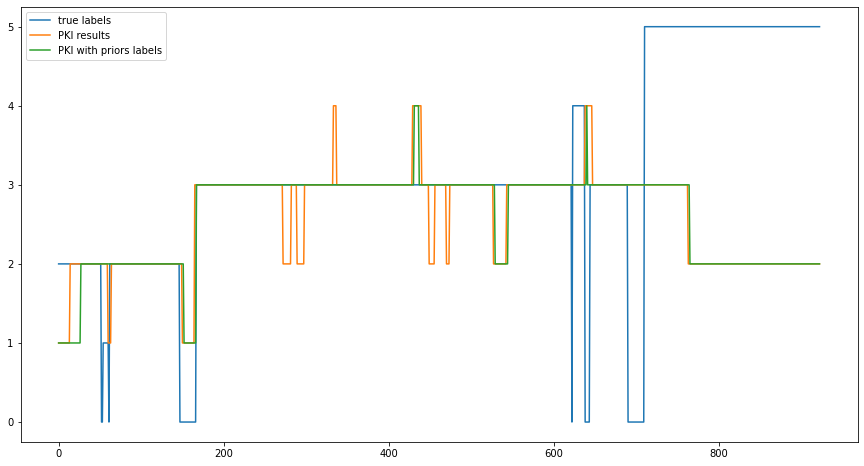

In [79]:
i = 9
##############
num = len(true_label_list)
figure(figsize=(15, 8))
x = list(range(len(true_label_list[i])))
plt.plot(x, true_label_list[i], label="true labels")
# plt.plot(x, pred_list[i], label="CNN prediction labels")
plt.plot(x, pki_list[i], label="PKI results")
plt.plot(x, pki_wo_zero_list[i], label="PKI with priors labels")
plt.legend()
plt.show()

In [80]:
print(true_label_list[i][:400])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [81]:
print(pred_list[i][:400])

[2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 4, 3, 3, 5, 5, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 4, 4, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 4, 4, 4, 

In [82]:
print(pki_list[i][:400].tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [83]:
print(pki_wo_zero_list[i][:400].tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

## Get statistics of time analysis
Get mean and standard deviation of the percentage of the video where new phase appears

In [225]:
# Get phase entry percentage stats dictionary
# init dict to log the percentage point for each phase across videos
# don't really care about zero here
phase_entry_perc_dict = {}
for i in range(1, 6):
    phase_entry_perc_dict[i] = []
    
for vid in data_dict:
    each_vid_stats = [[],[],[],[],[]]
    label_list = data_dict[vid]["label list"]
    label_freq = data_dict[vid]["label freq"]
    cur_tot = 0
    for i, num_of_frame in enumerate(label_freq):
        phase = label_list[i]
        if phase == 0:
            continue
        each_vid_stats[phase-1].append(cur_tot)
        # update cur_tot
        cur_tot += num_of_frame
    # get the percentage of entry point over all video
    print(each_vid_stats)
    for i in range(len(each_vid_stats)):
        each_vid_stats[i] = (np.asarray(each_vid_stats[i])/cur_tot).tolist()
    print(each_vid_stats)
    print()
    
    # add the stats into overall dict
    for i in range(len(each_vid_stats)):
        phase_entry_perc_dict[i+1] += each_vid_stats[i]
    

print("Final collection:")
for phase in phase_entry_perc_dict.keys():
    print("{}:{}".format(phase, phase_entry_perc_dict[phase]))
    print()
        

[[0], [169], [762, 1241], [1217], [1585]]
[[0.0], [0.09510410804727068], [0.4288126055149128, 0.6983680360157569], [0.6848621271806415], [0.8919527293190771]]

[[0], [41], [375], [851], [858]]
[[0.0], [0.041922290388548056], [0.3834355828220859], [0.8701431492842536], [0.8773006134969326]]

[[0], [84], [315, 885], [859], [1077]]
[[0.0], [0.06661379857256146], [0.24980174464710547, 0.7018239492466296], [0.6812053925455988], [0.8540840602696272]]

[[0], [47], [893, 1310], [1287], [1453]]
[[0.0], [0.030089628681177975], [0.5717029449423816, 0.8386683738796414], [0.823943661971831], [0.9302176696542894]]

[[146], [0, 247], [501, 1124], [1051], [1314]]
[[0.09240506329113925], [0.0, 0.15632911392405063], [0.31708860759493673, 0.7113924050632912], [0.6651898734177215], [0.8316455696202532]]

[[0], [153], [501, 898], [847], [1119]]
[[0.0], [0.1224], [0.4008, 0.7184], [0.6776], [0.8952]]

[[0], [54], [782], [1161], [1182]]
[[0.0], [0.04051012753188297], [0.5866466616654163], [0.8709677419354839

### Get entry time analysis for each phase considering multiple occurrences for same phase

In [226]:
# Get time analysis for each phase, separating different occurrences of the same phase
# don't care about zero first
phase_entry_perc_dict_v2 = {}
for i in range(1, 6):
    phase_entry_perc_dict_v2[i] = [[]]
    
for vid in data_dict:
    each_vid_stats = [[],[],[],[],[]]
    label_list = data_dict[vid]["label list"]
    label_freq = data_dict[vid]["label freq"]
    cur_tot = 0
    for i, num_of_frame in enumerate(label_freq):
        phase = label_list[i]
        if phase == 0:
            continue
        each_vid_stats[phase-1].append(cur_tot)
        # update cur_tot
        cur_tot += num_of_frame
    # get the percentage of entry point over all video
    print(each_vid_stats)
    for i in range(len(each_vid_stats)):
        each_vid_stats[i] = (np.asarray(each_vid_stats[i])/cur_tot).tolist()
    print(each_vid_stats)
    print()
    
    # add the stats into overall dict
    for i in range(len(each_vid_stats)):
        # if the current phase has multiple entrances, separate them into different lists
        for j in range(len(each_vid_stats[i])):
#             print("For phase {}, current stats array length is {}".format(i+1, len(each_vid_stats[i])))
            if (len(phase_entry_perc_dict_v2[i+1]))-1 < j:
                phase_entry_perc_dict_v2[i+1].append([])
#             print("For phase {}, current storage array length is {}".format(i+1, len(phase_entry_perc_dict[i+1])))
#             print()
            phase_entry_perc_dict_v2[i+1][j].append(each_vid_stats[i][j])
#             print("Collection so far:")
#             for phase in phase_entry_perc_dict.keys():
#                 print("{}:{}".format(phase, phase_entry_perc_dict[phase]))
#                 print()


    

print("Final collection:")
for phase in phase_entry_perc_dict_v2.keys():
    print("{}:{}".format(phase, phase_entry_perc_dict_v2[phase]))
    print()
        

[[0], [169], [762, 1241], [1217], [1585]]
[[0.0], [0.09510410804727068], [0.4288126055149128, 0.6983680360157569], [0.6848621271806415], [0.8919527293190771]]

[[0], [41], [375], [851], [858]]
[[0.0], [0.041922290388548056], [0.3834355828220859], [0.8701431492842536], [0.8773006134969326]]

[[0], [84], [315, 885], [859], [1077]]
[[0.0], [0.06661379857256146], [0.24980174464710547, 0.7018239492466296], [0.6812053925455988], [0.8540840602696272]]

[[0], [47], [893, 1310], [1287], [1453]]
[[0.0], [0.030089628681177975], [0.5717029449423816, 0.8386683738796414], [0.823943661971831], [0.9302176696542894]]

[[146], [0, 247], [501, 1124], [1051], [1314]]
[[0.09240506329113925], [0.0, 0.15632911392405063], [0.31708860759493673, 0.7113924050632912], [0.6651898734177215], [0.8316455696202532]]

[[0], [153], [501, 898], [847], [1119]]
[[0.0], [0.1224], [0.4008, 0.7184], [0.6776], [0.8952]]

[[0], [54], [782], [1161], [1182]]
[[0.0], [0.04051012753188297], [0.5866466616654163], [0.8709677419354839

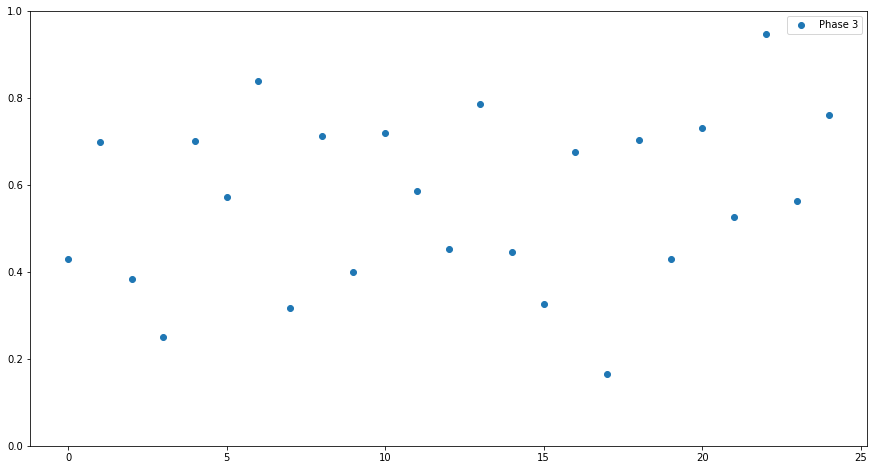

In [85]:
# Plot distribution of entry point for each phase for phase_entry_perc_dict
i = 3
##############
num = len(phase_entry_perc_dict[i])
figure(figsize=(15, 8))
x = list(range(num))
plt.scatter(x, phase_entry_perc_dict[i], label="Phase {}".format(i))
plt.ylim([0, 1])
plt.legend()
plt.show()

In [86]:
# model each distribution using a single gaussian distribution
entry_mean_std = {}
for phase in phase_entry_perc_dict:
    data = phase_entry_perc_dict[phase]
    mu, std = norm.fit(data)
    entry_mean_std[phase] = (mu, std)

print("Mean and std of phase entry point data:")
for phase in entry_mean_std:
    print("{}:{}".format(phase, entry_mean_std[phase]))

Mean and std of phase entry point data:
1:(0.021530641168332452, 0.04466921516625485)
2:(0.07669277360373275, 0.05985571659808397)
3:(0.564855905992737, 0.19512057484453402)
4:(0.7541856365162477, 0.08870227813781355)
5:(0.8693011991245339, 0.04706475581889002)


In [229]:
# model each distribution using gaussian distribution(s)
entry_mean_std_v2 = {}
for i in range(1, 6):
    entry_mean_std_v2[i] = []
for phase in phase_entry_perc_dict_v2:
    data = phase_entry_perc_dict_v2[phase]
    for i in range(len(data)):
        mu, std = norm.fit(data[i])
        entry_mean_std_v2[phase].append((mu, std))

print("Mean and std of phase entry point data with separate gaussian distributions:")
for phase in entry_mean_std_v2:
    print("{}:{}".format(phase, entry_mean_std_v2[phase]))

Mean and std of phase entry point data with separate gaussian distributions:
1:[(0.021530641168332452, 0.04466921516625485)]
2:[(0.061681605226245925, 0.047681925430239865), (0.14674489269867128, 0.06109964797723765)]
3:[(0.4177220251989481, 0.11941681518037026), (0.7521172088211959, 0.07588487244786433)]
4:[(0.7541856365162477, 0.08870227813781355)]
5:[(0.8693011991245339, 0.04706475581889002)]


## Get transition probability being updated by considering the entry point stats when the prediction differs from prior

In [133]:
# test out probability of having phase 5 at early part of the video
loc, scale = entry_mean_std[3]
print("{}, {}".format(loc, scale))
cdf = norm.cdf(0, loc=loc, scale=scale)

0.564855905992737, 0.19512057484453402


In [88]:
cdf

0.0018963547732762872

In [231]:
for i in range(1,6):
    l = entry_mean_std_v2[i]
    for (loc, scale) in l:
        print("phase {}: {}, {}".format(i, loc, scale))

phase 1: 0.021530641168332452, 0.04466921516625485
phase 2: 0.061681605226245925, 0.047681925430239865
phase 2: 0.14674489269867128, 0.06109964797723765
phase 3: 0.4177220251989481, 0.11941681518037026
phase 3: 0.7521172088211959, 0.07588487244786433
phase 4: 0.7541856365162477, 0.08870227813781355
phase 5: 0.8693011991245339, 0.04706475581889002


In [260]:
def getMaxCdf(entry_mean_std_v2, phase, perc):
#     print("Phase {}".format(phase))
    max_cdf = 0
    for (loc, scale) in entry_mean_std_v2[phase]:
#         print("loc, scale: {}, {}".format(loc, scale))
        max_cdf = max(norm.cdf(perc, loc=loc, scale=scale), max_cdf)
#     print("max_cdf at {}: {}".format(perc, max_cdf))
    return max_cdf

In [265]:
p = getMaxCdf(entry_mean_std_v2, 2, 0.98)
p

1.0

In [251]:
# update getNextPhase to consider the likelihood of phase transition based on stats
def getNextPhasev2(prob_sorted_mat, phase_sorted_mat, entry_mean_std, cur_phase, perc, is_verbose=False):
    # phase 5 has no other states to transit to
    if cur_phase == 5:
        return 5
    is_with_zero = len(prob_sorted_mat) == 6
    index = cur_phase if is_with_zero else cur_phase -1
    prob_sorted = prob_sorted_mat[index] 
    phase_sorted = phase_sorted_mat[index]
    # incorporate the phase entry point stats into probability
    max_prob = float('-inf')
    next_phase = cur_phase
    for i in range(len(prob_sorted)):
#         loc, scale = entry_mean_std[phase_sorted[i]]
#         stats_list = entry_mean_std_v2[phase_sorted[i]]
#         max_cdf = 0
#         for (loc, scale) in stats_list:
#             max_cdf = max(norm.cdf(perc, loc=loc, scale=scale), max_cdf) 
#         prob_sorted[i] *= max_cdf
        prob_sorted[i] *= getMaxCdf(entry_mean_std_v2, phase_sorted[i], perc)
        
        if prob_sorted[i] > max_prob:
            max_prob = prob_sorted[i]
            next_phase = phase_sorted[i]
        
    if is_verbose:
        print("Based on max probability {}, transition from {} to non-self phase {} happens!".format(max_prob, cur_phase, next_phase))
        print()
    return next_phase

In [301]:
# get the most probable phase at the given perc based on statistics
def getMostLikelyPhase(perc, is_verbose=False):
    final_phase = 0
    max_prob = 0 
    for phase in range(1, 6):
#         l = entry_mean_std_v2[phase]
#         max_cdf = 0
#         for (loc, scale) in l:
#             max_cdf = max(norm.cdf(perc, loc=loc, scale=scale), max_cdf)
        max_cdf = getMaxCdf(entry_mean_std_v2, phase, perc)
        max_cdf = min(max_cdf, 1-max_cdf)
        
        if max_cdf >= max_prob:
            final_phase = phase
            max_prob = max_cdf
    
    if is_verbose:
        print("Most probable phase at {} of video is {}".format(perc, final_phase))

    return final_phase

In [256]:
f = getMostLikelyPhase(0.98, True)

Phase 1
loc, scale: 0.021530641168332452, 0.04466921516625485
max_cdf at 0.98: 1.0
Phase 2
loc, scale: 0.061681605226245925, 0.047681925430239865
loc, scale: 0.14674489269867128, 0.06109964797723765
max_cdf at 0.98: 1.0
Phase 3
loc, scale: 0.4177220251989481, 0.11941681518037026
loc, scale: 0.7521172088211959, 0.07588487244786433
max_cdf at 0.98: 0.9999987524680578
Phase 4
loc, scale: 0.7541856365162477, 0.08870227813781355
max_cdf at 0.98: 0.9945479323217976
Phase 5
loc, scale: 0.8693011991245339, 0.04706475581889002
max_cdf at 0.98: 0.9906649431481523
Most probable phase at 0.98 of video is 5


In [322]:
# redesign pki with prior to check the likelihood of any prediction appearing at specific frame
'''
Prior Knowledge Inference:
Use prior knowledge of the phases to determine the current phase
Initialisation: based on initialisation probability
Piror_phase_th: still need to tune based on training data
Probability_th: use transitional probability factored by length cdf. 
            - If the transition has a confidence higher than the threshold, keep the CNN prediction state and update the prior (because that means the next phase has been reached)
            - else, udpate the prediction to prior
'''
def pkiWithPriorsv2(seq_pred, prior_th, lower_prob_th, higher_prob_th, trans_prob_mat, norm_params_dict, 
                  non_zero_init_prob_sorted, init_phases_sorted, 
                  entry_mean_std_v2, phase_entry_th, 
                  is_verbose=False):
    # for logging
    trans_probs = []
    transit_history = []
    pred_output = np.array(seq_pred).copy()
    # initialise prior phase based on initialisation probability
    init_phase = getInitPhase(trans_prob_mat, non_zero_init_prob_sorted, init_phases_sorted)
    
    total_frame = len(pred_output)
    prior = init_phase
    prev = pred_output[0]
    prev_phase_ending_frame = 0
    
    # prob_sorted and phase_sorted to get the next transition state based on transition probability
    prob_sorted_mat, phase_sorted_mat = getSortedProbsAndPhases(trans_prob_mat)
    
    # keep a counter to count how many new phases have appeared. if count > 5, update the prior to new phases
    count_new_phases = 0
    for index, prediction in enumerate(pred_output):
        perc = index/total_frame
        ############# A: get phase entry prob #############
        if prediction != 0: # coz the dict doesn't have zero
#             loc, scale = entry_mean_std[prediction]
#             phase_entry_cdf = norm.cdf(perc, loc=loc, scale=scale)
            phase_entry_cdf = getMaxCdf(entry_mean_std_v2, prediction, perc)
            if perc > 0.88:
                phase_entry_cdf = min(phase_entry_cdf, 1-phase_entry_cdf)
            if is_verbose:
                print("Min phase entry pdf of prediction {}:{}".format(prediction, phase_entry_cdf))
            if  phase_entry_cdf < phase_entry_th:
                # update the current prediction to prior and continue
                if is_verbose:
                    print("Prediction at index={} has been updated to prior {} because phase_entry_prob for {} is too low. This round ENDS".format(index, prior, prediction))
                pred_output[index] = prior
    
    
        ####### B: if counter > 5 and the transition from prior to current prediction is possible, update prior
        if count_new_phases > prior_th and prior != prev:
            prior = prev
            # update prev_phase_ending_frame
            prev_phase_ending_frame = index
            if is_verbose:
                print("Index {}: prior is updated from {} to {} because counter > prior_th".format(index, prior, prev))


                        
        # C: if transitional probability from previous to current is smaller than threshold, update it to prior
        # otherwise, update prior to the new prediction, as the high transition probability indicates a transition in the phase is likely to happen

        # get transition prob
        prior_phase_fcount = index - prev_phase_ending_frame
        if is_verbose:
            print("Index {}: prior {} has phase count {}".format(index, prior, prior_phase_fcount))
        trans_prob = getUpdatedMatrixWithPhaseLen(trans_prob_mat, norm_params_dict, prediction, prior, prior_phase_fcount, total_frame, is_verbose=is_verbose)


        # case 1: when prediction differs from prior
        if prediction != prior:
            if is_verbose:
                print("Index {}: PREDICTION AND PRIOR DIFFERENT".format(index))
            if trans_prob > lower_prob_th:
                if is_verbose:
                    print("Index {}: Prediction for trans {}-> {} with prob > {}".format(index, prior, prediction, lower_prob_th))
                    print("Index {}: Prior updated!\n".format(index))
                prior = prediction #update prior to the new prediction
                prev_phase_ending_frame = index
            else:
                # not likely for the prediction to happen
                pred_output[index] = prior
                
        # case 2: prediction same as prior
        else:
            if is_verbose:
                print("Index {}:SAME SAME LA".format(index))
            if trans_prob < higher_prob_th: # not likely to stay in the same phase
             # get a new phase from probability matrix
                if is_verbose:
                    print("Index {}: Prediction for trans {}-> {} with prob < {}".format(index, prior, prediction, higher_prob_th))
                    print("Index {}: Prior updated!\n".format(index))
                next_phase = getNextPhasev2(prob_sorted_mat, phase_sorted_mat, entry_mean_std, prediction, perc, is_verbose)
                prior = next_phase #only update prior, not the current prediction
                prev_phase_ending_frame = index
            # else stay in the current prior, which is the same as the prediction, so no change
            
        # logic to update counter based on continuity of prior prediction
        
        
        ##### D: update counter. WE STILL TRUST YOU CNN #######
        # check sanity of prediction first
        if prediction != 0:
#             loc, scale = entry_mean_std[prediction]
#             phase_entry_cdf = norm.cdf(perc, loc=loc, scale=scale)
            phase_entry_cdf = getMaxCdf(entry_mean_std_v2, prediction, perc)
            if perc > 0.88:
                phase_entry_cdf = min(phase_entry_cdf, 1-phase_entry_cdf)
            # if CNN prediction is insane, follow probability
            if phase_entry_cdf < phase_entry_th:
                phase = getMostLikelyPhase(perc)
                if is_verbose:
                    print("Index {}: NO TRUST IN CNN. Current percentage is {}. Current most probable phase is {}".format(index, perc, phase))
                    print("Index {}: update previous to phase {} instead of prediction {}".format(index, phase, prediction))
                if phase != prev:
                    prev = phase
                    count_new_phases = 0
                else:
                    count_new_phases += 1
                continue
        # if CNN prediction is reliable OR prediction == 0, update counter based on CNN prediction
        # if current prediction is same as the previous one, counter increment by 1
        if prediction == prev:
            count_new_phases += 1
        else:
            # reset counter
            prev = prediction
            count_new_phases = 0

        if is_verbose:
            print("Index {}: In the end, prior={} and output is updated to {}".format(index, prior, pred_output[index]))
            print()
    
    return pred_output

## This is for PKI with priors v2!!

In [321]:
# training and testing for pkiWithPriorv2
train_accs = []
test_accs = []
# log results
true_label_list = []
pred_list = []
pki_list = []
pki_prior_v2 = []

for index in range(7):
    lower_prob_th = 0.0025
    higher_prob_th = 0.63
    phase_entry_th = 0.022
#     phase_entry_th = 1e-4
    ##############################
    # ALL PATHS
    paramPath = "/home/yitong/venv_yitong/sacro_wf_analysis/params"
    path_prefix= '/home/yitong/venv_yitong/sacro_wf_analysis/'
    whole_path = path_prefix + 'data/sacro_sequence/whole'
    videos_path = path_prefix + 'data/sacro_jpg'
    output_path = '/home/jenna/jennaCode/model_outputs'
    true_label_path = "/home/jenna/sacro_results/results/"

    # folds for cross vaildation devision
    folders = ['folder1', 'folder2', 'folder3', 'folder4', 'folder5', 'folder6', 'folder7']
    divs = ['div1', 'div2', 'div3', 'div4', 'div5', 'div6', 'div7']


    folder = folders[index]
    div = divs[index]

    whole_folder_path = os.path.join(whole_path, folder)
    with open(os.path.join(videos_path, 'dataset_' + div + '.json'), 'r') as json_data:
        temp = json.load(json_data)
    # use all training and validation data for training
    video_train = temp['train']
    video_validation = temp['validation']
    # train on both training and validation set to find the highest average
    video_train_valid = video_train + video_validation
    video_test = temp['test']

    # apply pki with the video_train to get an average accuracy
    # tune parameters with different prior threshold
    for prior_th in [3]:
        ave_tr_acc = 0
        for video in video_train_valid:
            prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
            pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
            true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
            #### change here #############
            pki_output = pki([], pred_labels, prior_th, 1)
            pki_w_priors_output = pkiWithPriorsv2(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict,
                                                  non_zero_init_prob_sorted, init_phases_sorted, entry_mean_std_v2, phase_entry_th)
            ########################
            
            acc = accuracy_score(true_labels, pki_w_priors_output)
            ave_tr_acc += acc

        ave_tr_acc /= len(video_train_valid)
        train_accs.append(ave_tr_acc)
        print("Average training accuracy of fold {} with prior_th={}, lower_prob_th={} and higher_prob_th={} is {}".format(index+1, prior_th, lower_prob_th, higher_prob_th, ave_tr_acc))    
        
        
    # testing
    # finally report evaluation metrics on testing data
    ave_test_acc = 0
    prior_th = 3
    print("Number of videos in video test:{}".format(len(video_test)))
    for video in video_test:
        print("Video:{}".format(video))
        prob_vec = pickle.load(open(output_path + '/' + video + "/prob_vectors.pickle", 'rb'))
        pred_labels = pickle.load(open(output_path + '/' + video + "/seq_pred.pickle", 'rb'))
        true_labels = pickle.load(open(true_label_path +  '/' + video + "/seq_true.pickle", 'rb'))
        #### change here #############
#         if video == "e8d7e0c4-b293-43ce-832f-c37fb8fd3b23" and index < 200:
#             pki_w_priors_output = pki_w_priors_output = pkiWithPriorsv2(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, 
#                                                   non_zero_init_prob_sorted, init_phases_sorted, entry_mean_std_v2, phase_entry_th, is_verbose=True)


        pki_w_priors_output = pki_w_priors_output = pkiWithPriorsv2(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, 
                                                  non_zero_init_prob_sorted, init_phases_sorted, entry_mean_std_v2, phase_entry_th)

        pki_output = pki([], pred_labels, prior_th, 1)
#         pki_w_priors_output = pki_w_priors_output = pkiWithPriorsv2(pred_labels, prior_th, lower_prob_th, higher_prob_th, trans_mat_wo_zero, norm_params_dict, 
#                                                   non_zero_init_prob_sorted, init_phases_sorted, entry_mean_std, phase_entry_th)
        #####################
        ######log results########
        true_label_list.append(true_labels)
        pred_list.append(pred_labels)
        pki_list.append(pki_output)
        pki_prior_v2.append(pki_w_priors_output)
        #############################
        acc = accuracy_score(true_labels, pki_w_priors_output)
        ave_test_acc += acc

    ave_test_acc /= len(video_test)
    print("Average test accuracy of fold {} is {}".format(index+1,ave_test_acc))

    # append results
    test_accs.append(ave_test_acc)
    
    
# final average training accuracy
print()
print("Overall average training accuracy with with prior_th={}, lower_prob_th={}, higher_prob_th={} and phase_entry_th = {} is {}".format(prior_th, lower_prob_th, higher_prob_th, phase_entry_th, sum(train_accs)/len(train_accs)))
    

Average training accuracy of fold 1 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.8023044134283732
Number of videos in video test:2
Video:e8d7e0c4-b293-43ce-832f-c37fb8fd3b23
Video:f63b25f4-8df4-4336-8c02-9456eb3c09b0
Average test accuracy of fold 1 is 0.822891830214514
Average training accuracy of fold 2 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.808593017365996
Number of videos in video test:2
Video:cf7cf863-929a-4b89-962b-7913869167e4
Video:b6701cb1-3a9b-456e-ad73-c6e06eea03ec
Average test accuracy of fold 2 is 0.7851602065887779
Average training accuracy of fold 3 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.8034598146464785
Number of videos in video test:2
Video:315ac662-9e95-4dec-80f0-48e244f9f8e1
Video:a90983a1-2329-4019-96e8-949493c3fc24
Average test accuracy of fold 3 is 0.8159594229058824
Average training accuracy of fold 4 with prior_th=3, lower_prob_th=0.0025 and higher_prob_th=0.63 is 0.8083785715462327
Num

## Documentation for PKI with Priors with time analysis stats (v2):
Data for algorithm enforcing phase 5 stats
Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025, higher_prob_th=0.63 and phase_entry_th = 0.011 is 0.8095949420842522

Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025, higher_prob_th=0.63 and phase_entry_th = 0.015 is 0.8115427172087648

Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025, higher_prob_th=0.63 and phase_entry_th = 0.022 is 0.8140954962706429

Data for algorithm without enforcing phase 5 stats:
Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025, higher_prob_th=0.63 and phase_entry_th = 0.022 is 0.8033120160619337

Data for algorithm enforcing phase 5 stats Using 0.88:
Overall average training accuracy with with prior_th=3, lower_prob_th=0.0025, higher_prob_th=0.63 and phase_entry_th = 0.022 is 0.811155149011382

In [324]:
num = len(true_label_list)
for i in range(num):
    true_labels = true_label_list[i]
    pki_acc =  accuracy_score(true_labels, pki_list[i])
    pki_prior_acc = accuracy_score(true_labels, pki_wo_zero_list[i])
    pki_v2_acc = accuracy_score(true_labels, pki_prior_v2[i])
    print("Video {}:".format(i+1))
    print("PKI acc: {}".format(pki_acc))
    print("PKI with priors: {}".format(pki_prior_acc))
    print("PKI with priors and phase entry point acc: {}".format(pki_v2_acc))
    print()

Video 1:
PKI acc: 0.6834285714285714
PKI with priors: 0.6845714285714286
PKI with priors and phase entry point acc: 0.7748571428571429

Video 2:
PKI acc: 0.9015974440894569
PKI with priors: 0.8345047923322684
PKI with priors and phase entry point acc: 0.870926517571885

Video 3:
PKI acc: 0.8003309431880861
PKI with priors: 0.8246001103143961
PKI with priors and phase entry point acc: 0.8157749586321015

Video 4:
PKI acc: 0.7612121212121212
PKI with priors: 0.8369696969696969
PKI with priors and phase entry point acc: 0.7545454545454545

Video 5:
PKI acc: 0.7378138847858198
PKI with priors: 0.7806499261447563
PKI with priors and phase entry point acc: 0.8397341211225997

Video 6:
PKI acc: 0.7460035523978685
PKI with priors: 0.7877442273534636
PKI with priors and phase entry point acc: 0.7921847246891652

Video 7:
PKI acc: 0.628175519630485
PKI with priors: 0.674364896073903
PKI with priors and phase entry point acc: 0.7609699769053118

Video 8:
PKI acc: 0.7074370006146281
PKI with prior

In [112]:
print(type(true_label_list[i]))

<class 'list'>


In [191]:
i = 0
print("Ground truth for video {}'s first 200 frames:\n{}".format(i+1, np.asarray(true_label_list[i])[:200]))
print("PKI prediction for video {}'s first 200 frames:\n{}".format(i+1, pki_list[i][:200]))
print("PKI prediction with transition and duration statistics for video {}'s first 200 frames:\n{}".format(i+1, pki_wo_zero_list[i][:200]))
print("PKI prediction with transition, duration and entry point statistics for video {}'s first 200 frames:\n{}".format(i+1, pki_prior_v2[i][:200]))

Ground truth for video 1's first 200 frames:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
PKI prediction for video 1's first 200 frames:
[1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
PKI prediction with transition and duration statistics for video 1's first 200 frames:
[1 1 1 

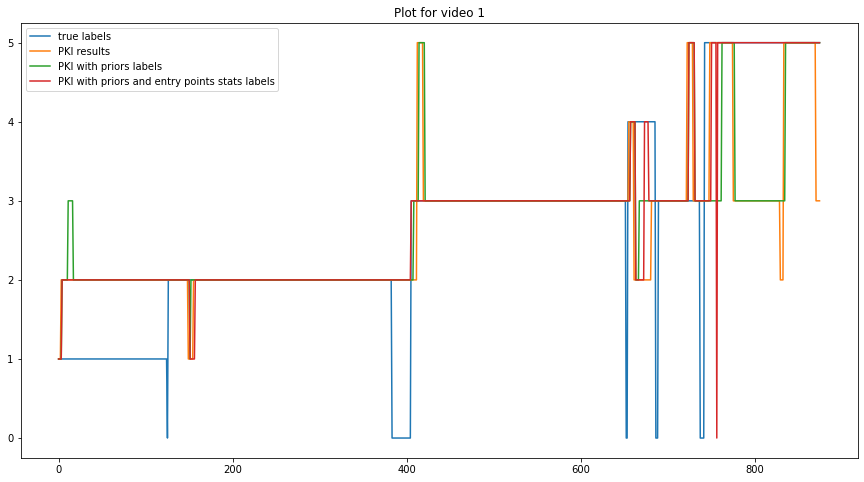

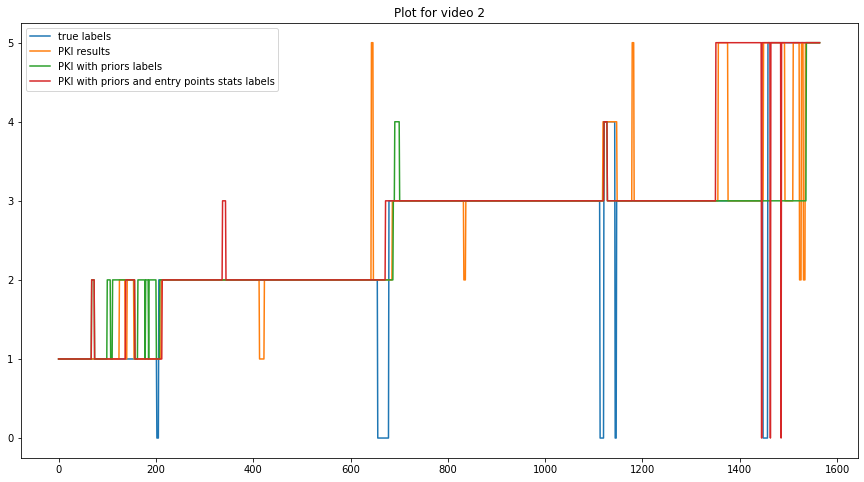

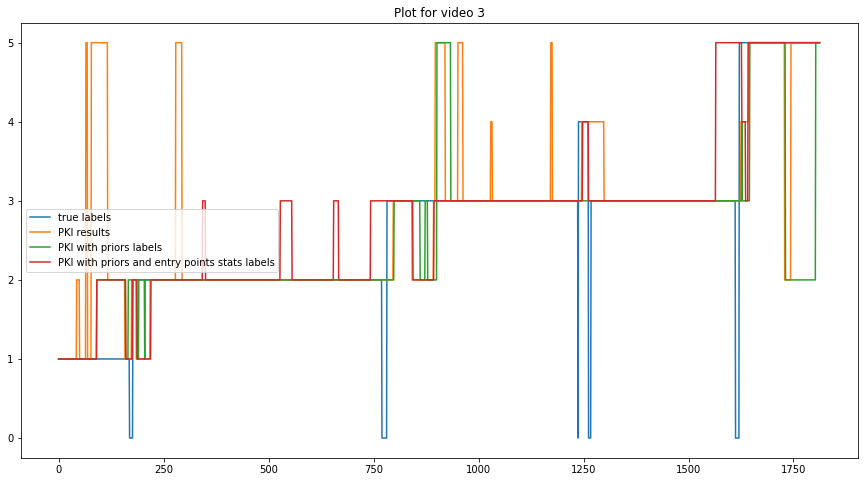

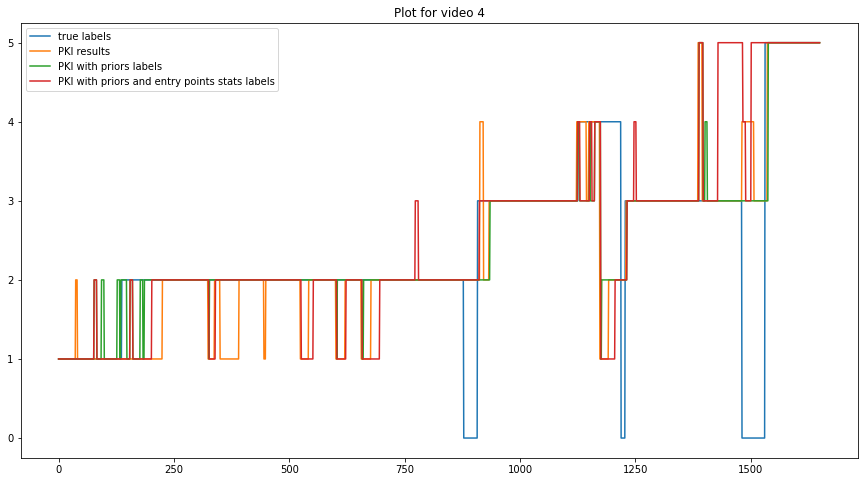

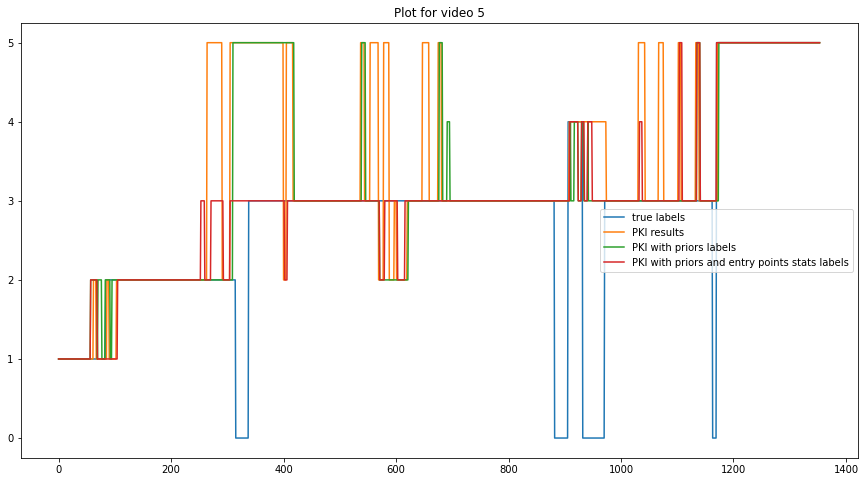

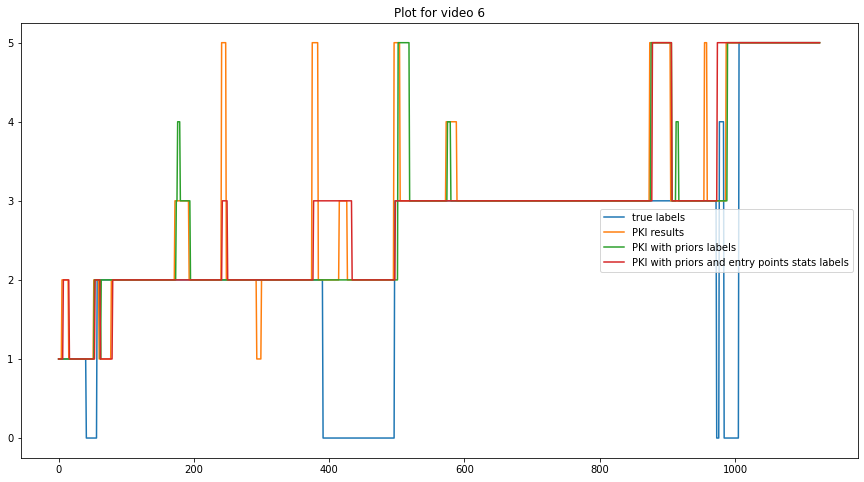

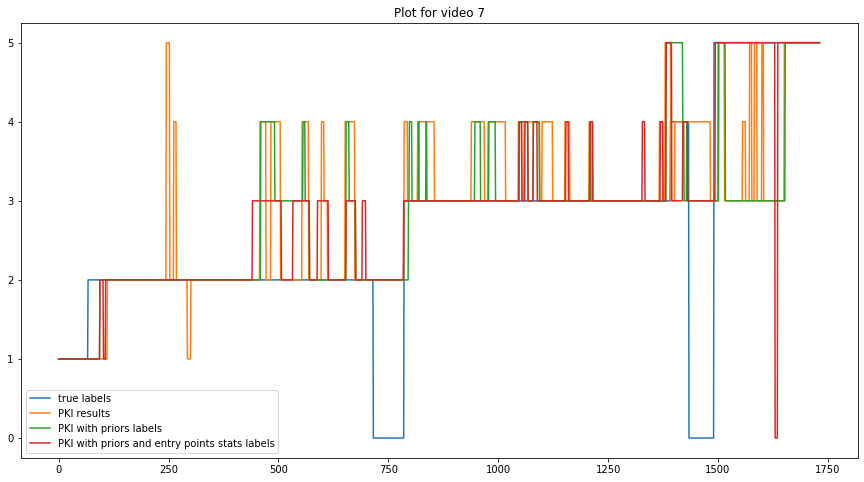

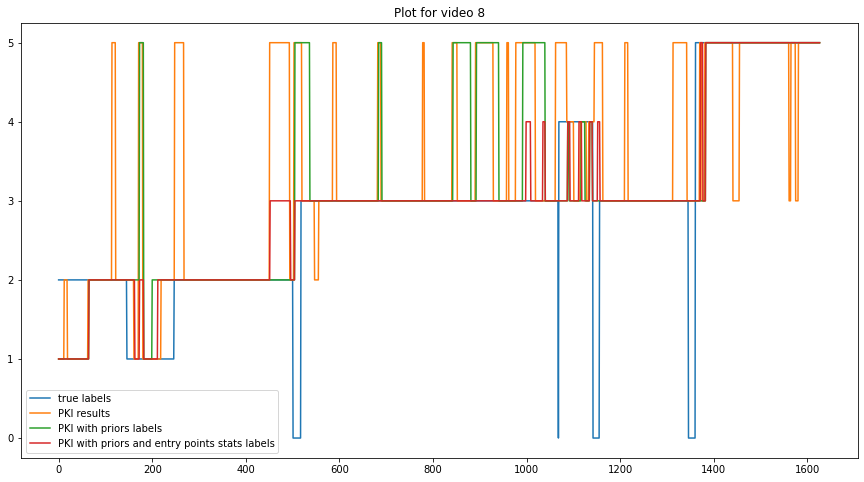

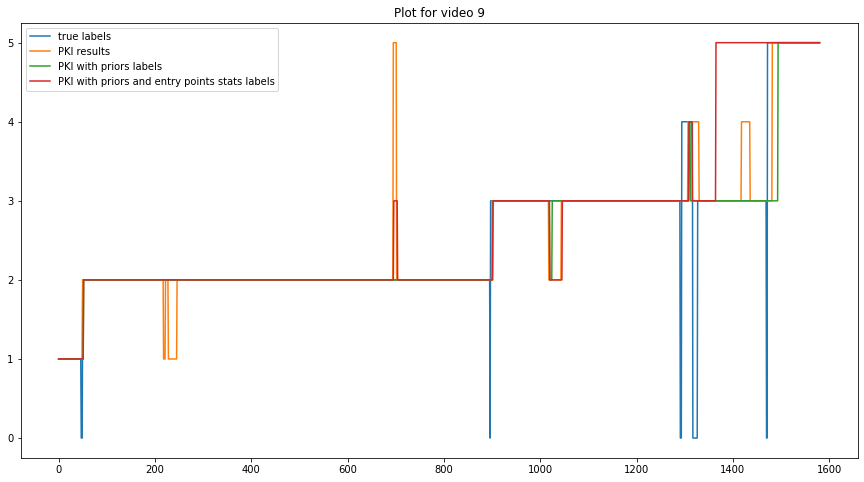

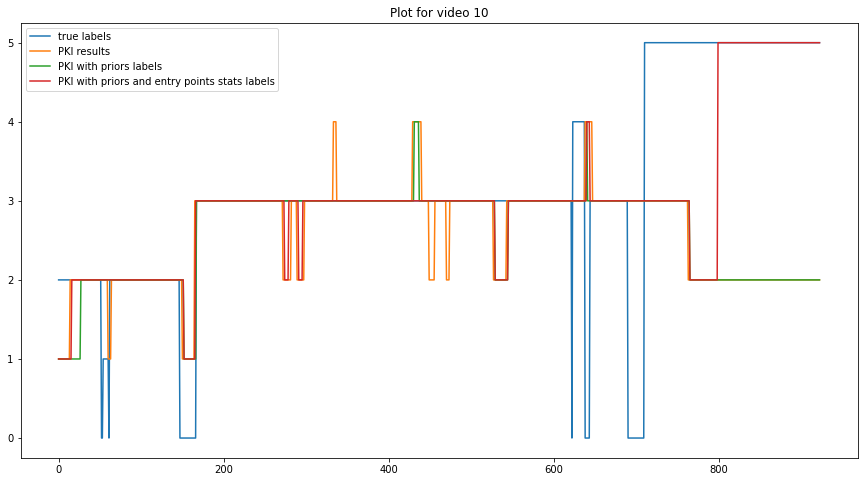

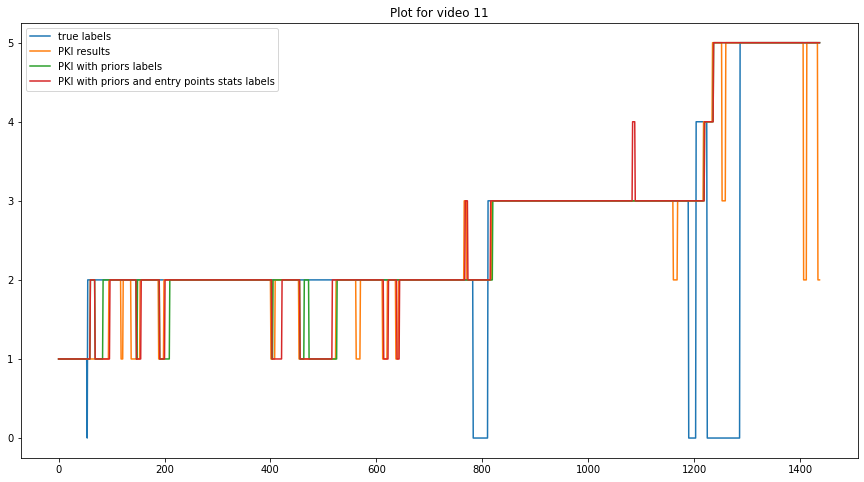

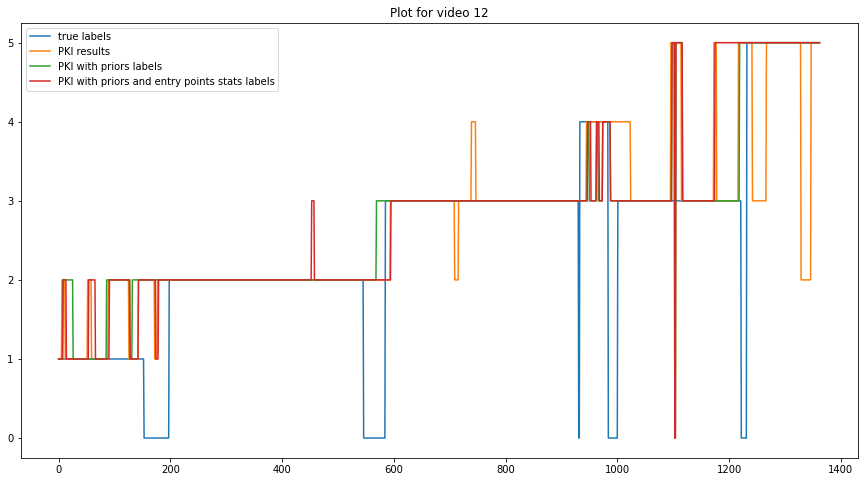

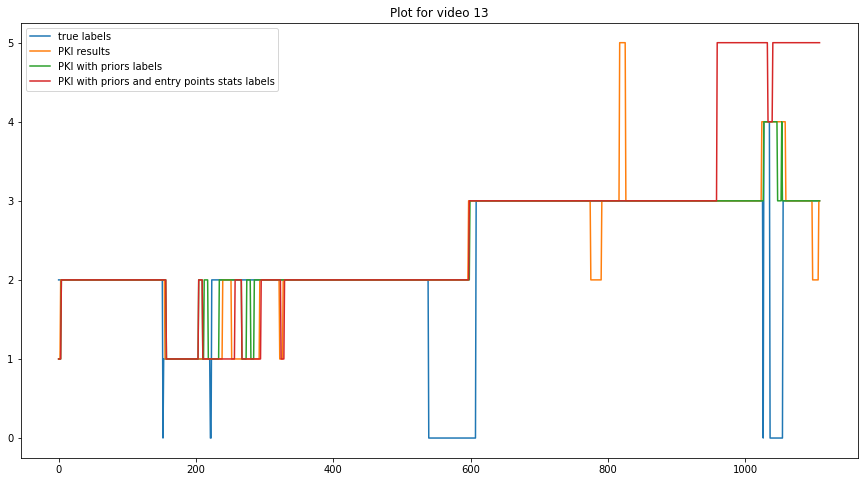

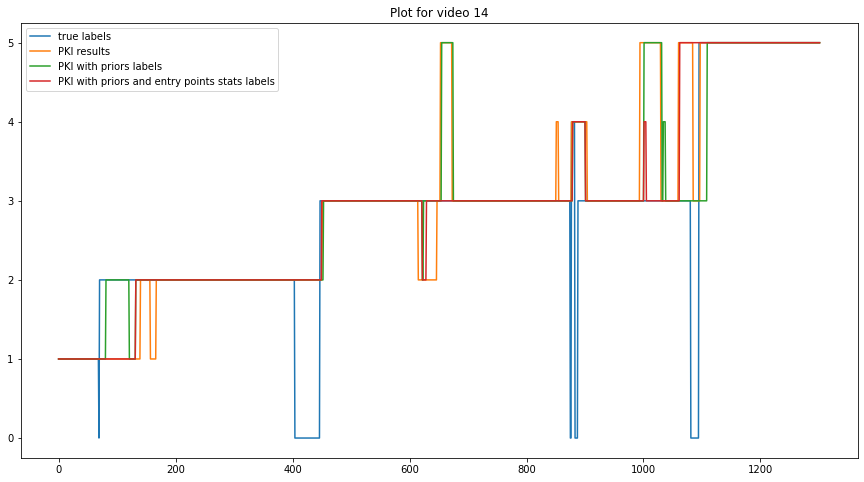

In [323]:
for i in range(14):
##############
    num = len(true_label_list)
    figure(figsize=(15, 8))
    x = list(range(len(true_label_list[i])))
    plt.plot(x, true_label_list[i], label="true labels")
#     plt.plot(x, pred_list[i], label="CNN prediction labels")
    plt.plot(x, pki_list[i], label="PKI results")
    plt.plot(x, pki_wo_zero_list[i], label="PKI with priors labels")
    plt.plot(x, pki_prior_v2[i], label="PKI with priors and entry points stats labels")
    plt.legend()
    plt.title("Plot for video {}".format(i+1))
    plt.show()